**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**SUPERVISED MACHINE LEARNING: ANÁLISE DE REGRESSÃO SIMPLES E MÚLTIPLA**<br>
**Prof. Dr. Luiz Paulo Fávero**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>


*coding: utf-8*

In [6]:
# In[0.1]: Instalação dos pacotes

# !pip install pandas
# !pip install numpy
# !pip install -U seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install scipy
# !pip install statsmodels
# !pip install scikit-learn
# !pip install playsound
# !pip install pingouin
# !pip install emojis
# !pip install statstests

In [1]:
# In[0.2]: Importação dos pacotes

import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import matplotlib.cm as cm
import matplotlib.image as mpimg # carregar imagem 
import plotly.graph_objects as go # gráficos 3D
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import urllib.request
import networkx as nx
import statsmodels.api as sm # estimação de modelos
#import emojis # inserção de emojis em gráficos
from PIL import Image
from io import BytesIO
from scipy.stats import pearsonr # correlações de Pearson
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder # transformação de dados
#from playsound import playsound # reprodução de sons => não foi possível instalar para o Python 3.12
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox, norm, interpolate # transformação de Box-Cox; plotagem da curva normal
from scipy.optimize import curve_fit
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# In[EXEMPLO 1]:
#############################################################################
#                          REGRESSÃO LINEAR SIMPLES                         #
#                  EXEMPLO 1 - CARREGAMENTO DA BASE DE DADOS                #
#############################################################################
    

df_tempodist = pd.read_csv('data/tempodist.csv', delimiter=',')
df_tempodist

# Características das variáveis do dataset
df_tempodist.info()

# Estatísticas univariadas
df_tempodist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

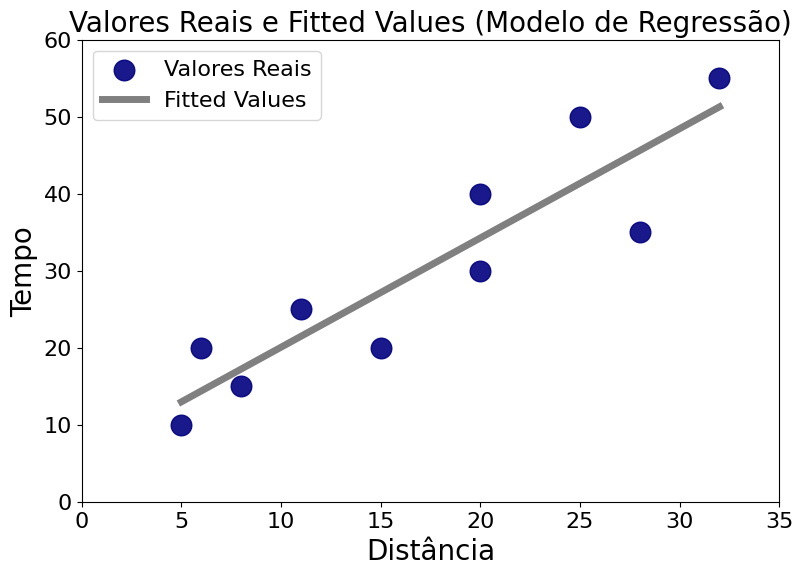

In [9]:
# In[1.1]: Gráfico de dispersão com o ajuste linear (fitted values de um modelo
#de regressão) que se adequa às observações: função 'regplot' do pacote 'seaborn'

plt.figure(figsize=(9,6))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=20)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=16, loc='upper left')
plt.show

In [10]:
# # In[1.2]: Gráfico de dispersão interativo (figura 'EXEMPLO1.html' salva na
# #pasta do curso)

# # Dados do gráfico
# x = df_tempodist['distancia']
# y = df_tempodist['tempo']

# # Definição da regressão linear
# slope, intercept = np.polyfit(x, y, 1)
# y_trend = slope * x + intercept

# fig = go.Figure()

# # Inserção dos pontos (valores reais)
# fig.add_trace(go.Scatter(
#     x=x,
#     y=y,
#     mode='markers',
#     marker=dict(color='navy', size=18), name='Valores Reais')
#     )

# # Inserção da reta (fitted values)
# fig.add_trace(go.Scatter(
#     x=x,
#     y=y_trend,
#     mode='lines',
#     line=dict(color='dimgray', width=5), name='Fitted Values')
#     )

# # Configurações de layout
# fig.update_layout(
#     xaxis_title='Distância',
#     yaxis_title='Tempo',
#     title={
#         'text': 'Gráfico de Dispersão com Fitted Values',
#         'font': {'size': 18, 'color': 'black', 'family': 'Arial'},
#         'x': 0.5,
#         'y': 0.97,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     },
#     plot_bgcolor='snow',
#     xaxis=dict(gridcolor='black'),
#     yaxis=dict(gridcolor='black'),
#     showlegend=True
# )

# # fig.write_html('EXEMPLO1.html')

# # # Abrir o arquivo HTML no navegador
# # import webbrowser
# # webbrowser.open('EXEMPLO1.html')

# fig.show()

In [11]:
# In[1.3]: Estimação do modelo de regressão linear simples

# Estimação do modelo
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

# Observação dos parâmetros resultantes da estimação
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           0.000314
Time:                        17:01:13   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.2

c:\Users\madeinweb\Documents\GitHub\supervised-machine-learning\myenv\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Significados:<br>
**Alpha/Interept**: valor de y em x=0<br>
**Beta/Inclinação/distância**: o quanto de y se altera com uma unidade de x (no caso aqui, para cada km a mais, arescenta-se 1.4189 minutos do trajeto)<br>
**R^2/R-squared**: explicabilidade de uma variável em relação à outra (no caso aqui, 81.9% da variação do tempo é justificada pela variação da distância)

In [12]:
# In[1.4]: Salvando fitted values (variável yhat) e residuals (variável erro)
#no dataset

df_tempodist['yhat'] = modelo.fittedvalues
df_tempodist['erro'] = modelo.resid
df_tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


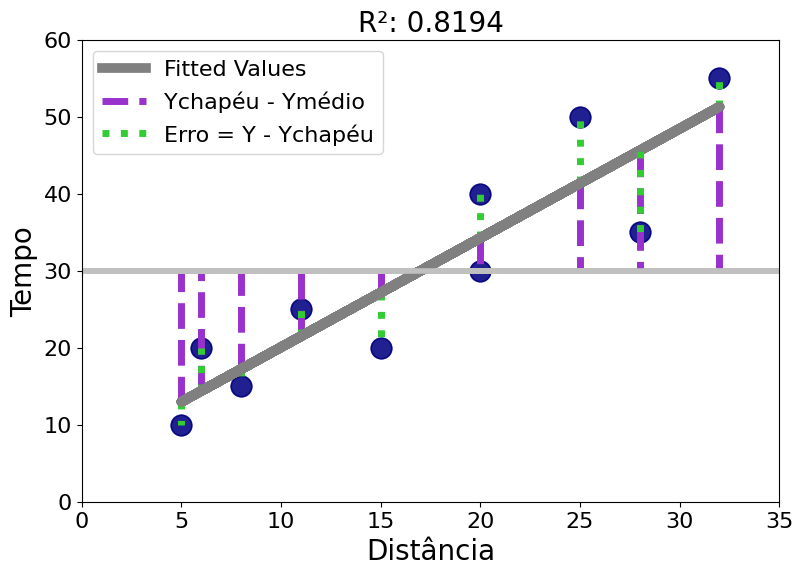

In [13]:
# In[1.5]: Gráfico didático para visualizar o conceito de R²

plt.figure(figsize=(9,6))
y = df_tempodist['tempo']
yhat = df_tempodist['yhat']
x = df_tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot(x, yhat, color='grey', linewidth=7)
    plt.plot([x[i], x[i]], [yhat[i], mean[i]], '--', color='darkorchid', linewidth=5)
    plt.plot([x[i], x[i]], [yhat[i], y[i]],':', color='limegreen', linewidth=5)
    plt.scatter(x, y, color='navy', s=220, alpha=0.2)
    plt.axhline(y = y.mean(), color = 'silver', linestyle = '-', linewidth=4)
    plt.title('R²: ' + str(round(modelo.rsquared, 4)), fontsize=20)
    plt.xlabel('Distância', fontsize=20)
    plt.ylabel('Tempo', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0, 35)
    plt.ylim(0, 60)
    plt.legend(['Fitted Values', 'Ychapéu - Ymédio', 'Erro = Y - Ychapéu'],
               fontsize=16, loc='upper left')
plt.show()

In [14]:
# In[1.6]: Cálculo manual do R²

R2 = ((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()/(((df_tempodist['yhat']-
                                        df_tempodist['tempo'].mean())**2).sum()+
                                        (df_tempodist['erro']**2).sum())

round(R2,4)

0.8194

In [15]:
# In[1.7]: Coeficiente de ajuste (R²) é a correlação ao quadrado

# Correlação de Pearson
df_tempodist[['tempo','distancia']].corr()

# R²
(df_tempodist[['tempo','distancia']].corr())**2

# R² de maneira direta
modelo.rsquared

0.8194256756756757

In [16]:
# In[1.8]: Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos)

# Estimação do modelo com yhat como variável dependente resultará em um modelo
#com R² igual a 100%
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()

# Parâmetros resultantes da estimação deste modelo didático
modelo_auxiliar.summary()

c:\Users\madeinweb\Documents\GitHub\supervised-machine-learning\myenv\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          1.72e-122
Time:                        17:01:13   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.000       5.878       5.878
distancia      1.4189   3.55e-16      4e+15      0.000       1.419       1.419
==============================================================================
Omnibus:                       13.263   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                1.667
Skew:                           0.000   Prob(JB):                        0.435
Kurtosis:                       1.000   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

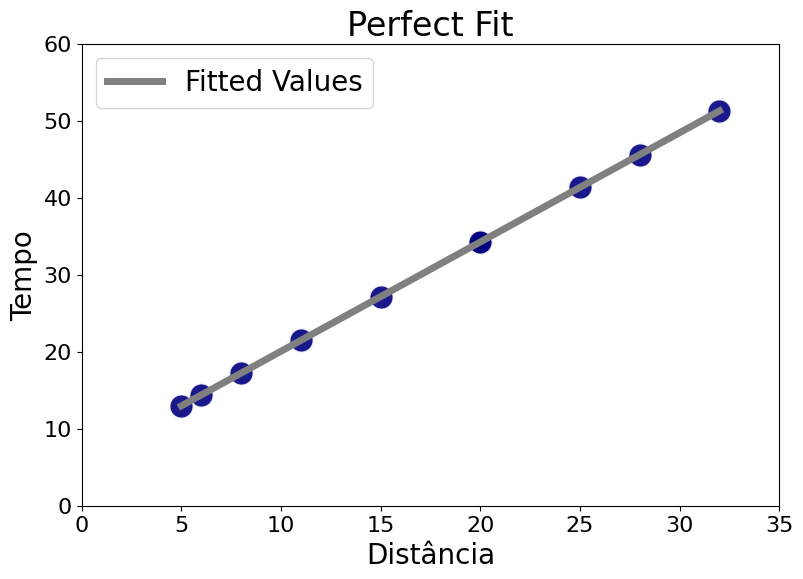

In [17]:
# In[1.9]:Gráfico mostrando o perfect fit

plt.figure(figsize=(9,6))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=300)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Perfect Fit', fontsize=24)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=20)
plt.show

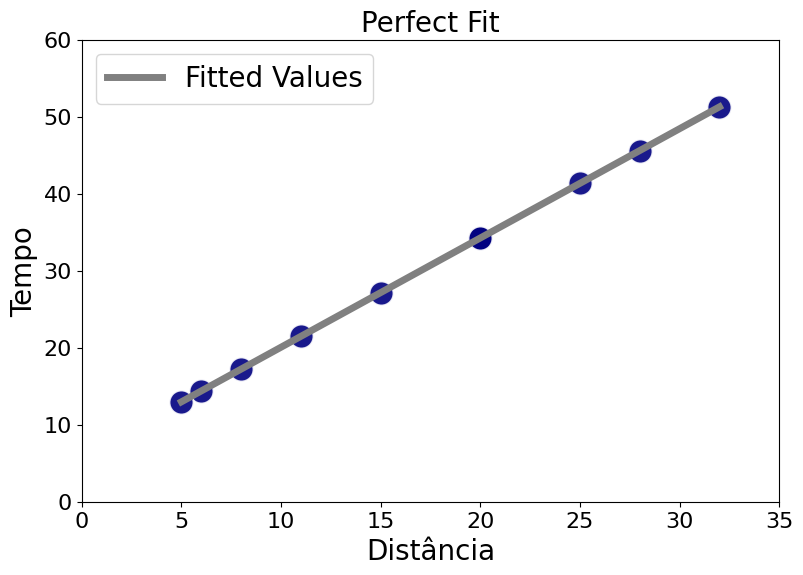

In [18]:
# In[1.10]:Gráfico mostrando o perfect fit com figura .JPG e som .MP3

# Define a URL da imagem (FONTE: Divulgação/Warner Bros. Pictures)
url = "https://cinebuzz.uol.com.br/media/uploads/harry_potter_3_WumwIEd.jpg"

# Define os cabeçalhos da solicitação
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Cria uma solicitação com os cabeçalhos
request = urllib.request.Request(url, headers=headers)

# Abre a URL e lê os dados da imagem
response = urllib.request.urlopen(request)
image_data = response.read()

# Carrega a imagem em um objeto PIL (Python Imaging Library)
imagem = Image.open(BytesIO(image_data))

# Define as dimensões e a posição desejada da imagem
nova_largura = 8400  # Largura da imagem redimensionada
nova_altura = 5430  # Altura da imagem redimensionada
posicao_x = 630  # Posição horizontal da imagem
posicao_y = 600  # Posição vertical da imagem

# Redimensiona a imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Cria o gráfico por meio da função 'regplot' do pacote 'seaborn'
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=300)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Perfect Fit', fontsize=20)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=20)
plt.show

# Adiciona a imagem redimensionada em uma posição específica do gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1, alpha=0.20)

# Exibe o gráfico com a imagem
plt.show()

# Reproduz um som padrão (arquivo na pasta do curso)
# Aqui você deve colocar a URL da pasta em que se encontra o arquivo 'sound.mp3',
#com duas barras!
# playsound('C:\\MBA DSA USP Esalq\\Análise de Regressão Simples e Múltipla\\sound.mp3')

<function matplotlib.pyplot.show(close=None, block=None)>

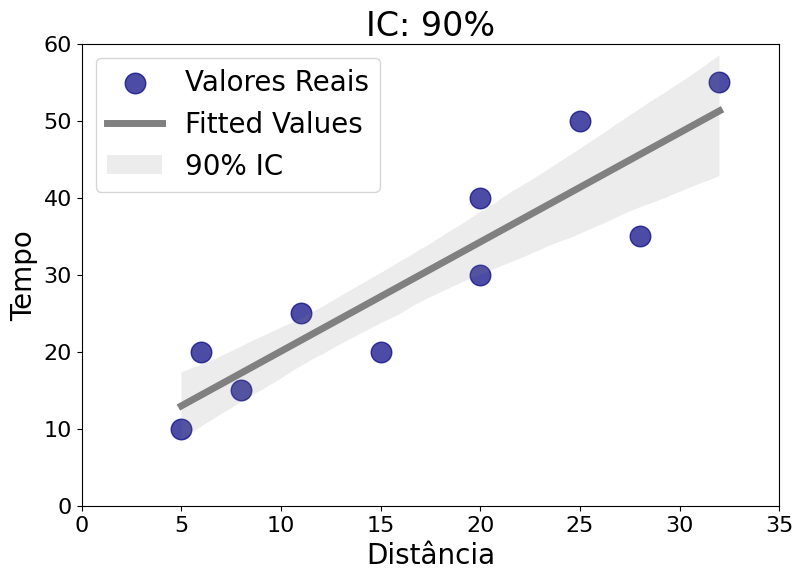

In [19]:
# In[1.11]: Voltando ao nosso modelo original

# Gráfico com intervalo de confiança de 90%

plt.figure(figsize=(9,6))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=90,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 90%', fontsize=24)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '90% IC'],
           fontsize=20, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

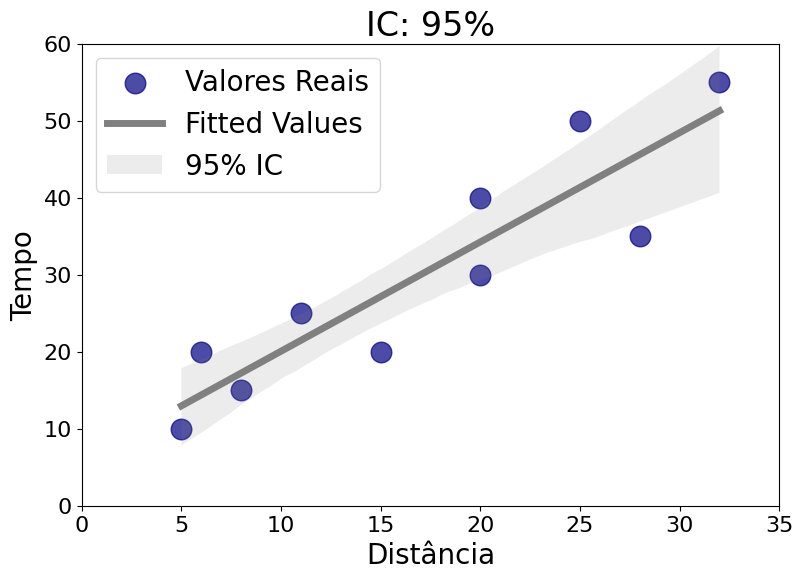

In [20]:
# In[1.12]: Gráfico com intervalo de confiança de 95%

plt.figure(figsize=(9,6))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 95%', fontsize=24)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'],
           fontsize=20, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

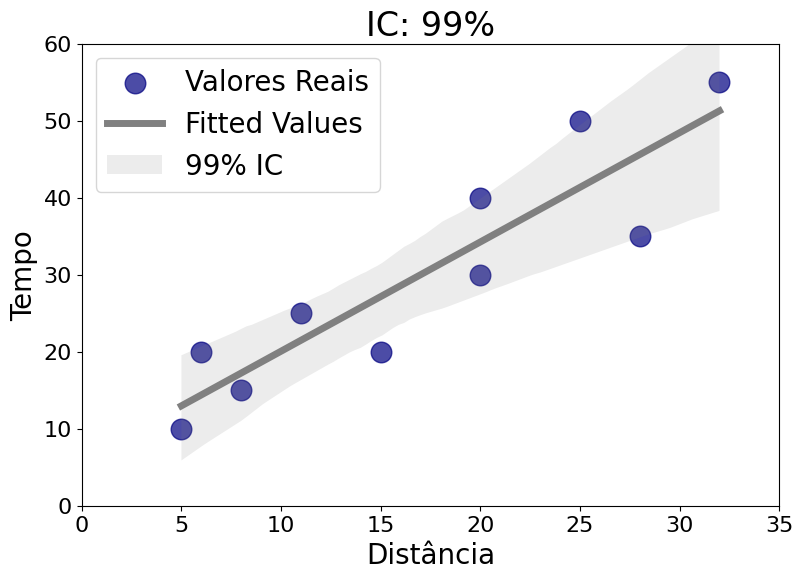

In [21]:
# In[1.13]: Gráfico com intervalo de confiança de 99%

plt.figure(figsize=(9,6))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 99%', fontsize=24)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99% IC'],
           fontsize=20, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

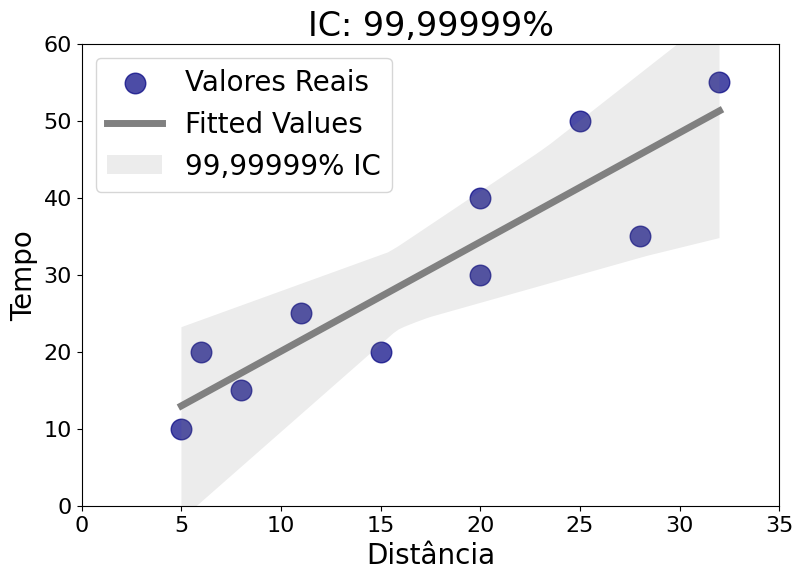

In [22]:
# In[1.14]: Gráfico com intervalo de confiança de 99,99999%

plt.figure(figsize=(9,6))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99.99999,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 99,99999%', fontsize=24)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99,99999% IC'],
           fontsize=20, loc='upper left')
plt.show

In [23]:
# In[1.15]: Calculando os intervalos de confiança

# Nível de significância de 10% / Nível de confiança de 90%
modelo.conf_int(alpha=0.1)

# Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

# Nível de significância de 1% / Nível de confiança de 99%
modelo.conf_int(alpha=0.01)

# Nível de significância de 0,00001% / Nível de confiança de 99,99999%
modelo.conf_int(alpha=0.0000001)

,0,1
Intercept,-74.960201,86.716957
distancia,-2.781409,5.619247


In [24]:
# In[1.16]: Fazendo predições em modelos OLS
# Ex.: Qual seria o tempo gasto, em média, para percorrer a distância de 25km?

# Cálculo manual
5.8784 + 1.4189*(25)

# Cálculo utilizando os próprios parâmetros estimados do modelo
modelo.params[0] + modelo.params[1]*(25)

# Maneira direta utilizando a função 'DataFrame' do pacote 'pandas' dentro
#da função 'predict'
modelo.predict(pd.DataFrame({'distancia':[25]}))

0    41.351351
dtype: float64

In [25]:
# In[1.17]: Nova modelagem para o mesmo exemplo, com novo dataset que
#contém replicações

# Quantas replicações de cada linha você quer? -> função 'repeat' do 'numpy'
df_replicado = pd.DataFrame(np.repeat(df_tempodist.values, 3, axis=0))
df_replicado.columns = df_tempodist.columns
df_replicado

,tempo,distancia,yhat,erro
0,15.0,8.0,17.229730,-2.229730
1,15.0,8.0,17.229730,-2.229730
2,15.0,8.0,17.229730,-2.229730
3,20.0,6.0,14.391892,5.608108
4,20.0,6.0,14.391892,5.608108
5,20.0,6.0,14.391892,5.608108
6,20.0,15.0,27.162162,-7.162162
7,20.0,15.0,27.162162,-7.162162
8,20.0,15.0,27.162162,-7.162162
9,40.0,20.0,34.256757,5.743243


In [26]:
# In[1.18]: Estimação do modelo com valores replicados

modelo_replicado = sm.OLS.from_formula('tempo ~ distancia',
                                       df_replicado).fit()

# Parâmetros do 'modelo_replicado'
print(modelo_replicado.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     127.1
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           6.42e-12
Time:                        17:01:17   Log-Likelihood:                -96.369
No. Observations:                  30   AIC:                             196.7
Df Residuals:                      28   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      2.423      2.426      0.0

In [27]:
# In[1.19]: Calculando os novos intervalos de confiança

# Nível de significância de 5% / Nível de confiança de 95%
modelo_replicado.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distancia,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

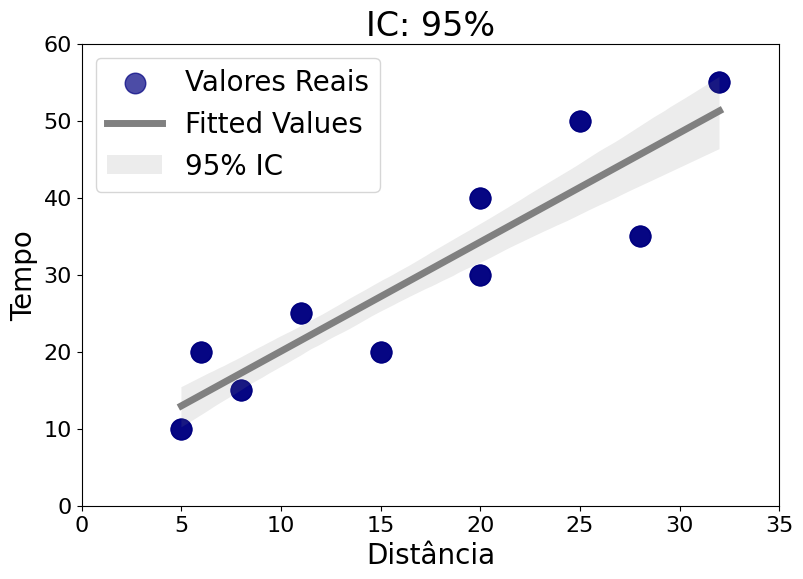

In [28]:
# In[1.20]: Plotando o novo gráfico com intervalo de confiança de 95%
# Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(9,6))
sns.regplot(data=df_replicado, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 95%', fontsize=24)
plt.xlabel('Distância', fontsize=20)
plt.ylabel('Tempo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'],
           fontsize=20, loc='upper left')
plt.show

In [29]:
# In[1.21]: PROCEDIMENTO ERRADO: ELIMINAR O INTERCEPTO QUANDO ESTE NÃO SE
#MOSTRAR ESTATISTICAMENTE SIGNIFICANTE

modelo_errado = sm.OLS.from_formula('tempo ~ 0 + distancia', df_tempodist).fit()

# Parâmetros do 'modelo_errado'
print(modelo_errado.summary())

                                 OLS Regression Results                                
Dep. Variable:                  tempo   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              217.5
Date:                Fri, 16 Aug 2024   Prob (F-statistic):                    1.31e-07
Time:                        17:01:17   Log-Likelihood:                         -33.077
No. Observations:                  10   AIC:                                      68.15
Df Residuals:                       9   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\madeinweb\Documents\GitHub\supervised-machine-learning\myenv\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [30]:
# In[1.22]: Comparando os parâmetros do modelo inicial (objeto 'modelo')
#com o 'modelo_errado' pela função 'summary_col' do pacote
#'statsmodels.iolib.summary2'

summary_col([modelo, modelo_errado])

# Outro modo mais completo também pela função 'summary_col'
summary_col([modelo, modelo_errado],
            model_names=["MODELO INICIAL","MODELO ERRADO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,MODELO INICIAL,MODELO ERRADO
Intercept,5.8784,
,(4.5323),
R-squared,0.8194,0.9603
R-squared Adj.,0.7969,0.9558
distancia,1.4189***,1.6887***
,(0.2355),(0.1145)
N,10,10


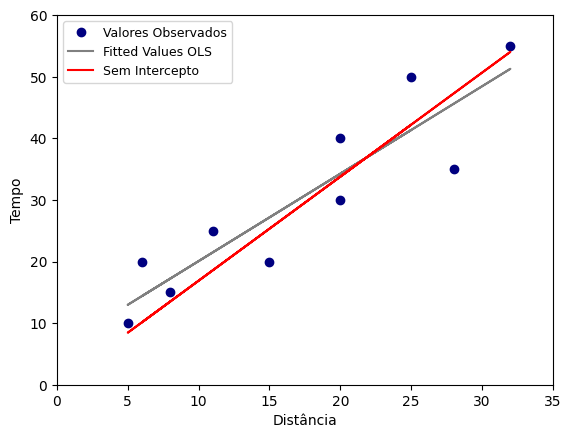

In [31]:
# In[1.23]: Gráfico didático para visualizar o viés decorrente de se eliminar
#erroneamente o intercepto em modelos regressivos

x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)
plt.show()

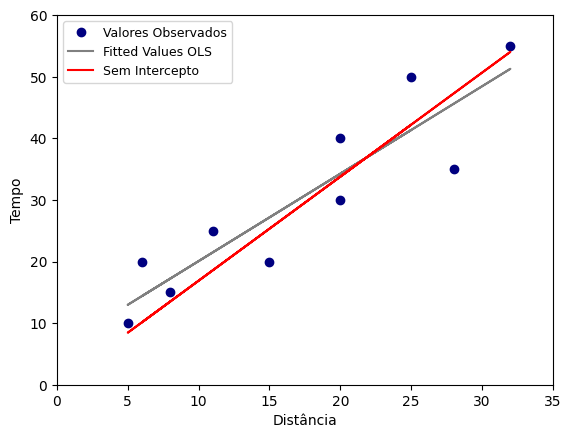

In [32]:
# In[1.24]: DÚVIDA: Qual estimação devo escolher? (com figura proveninente de URL)

# Definição da URL da imagem
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKNf7Jk3b2LG23egCN7w7TW0275Vd2_lhYWHLlGGizplLYc74wLukF-EbOIB8YY8YB9L0&usqp=CAU"

# Carregamento da imagem da URL
imagem = Image.open(urllib.request.urlopen(url))

# Definição das dimensões e da posição desejada da imagem
nova_largura = 700  # Largura da imagem redimensionada
nova_altura = 1000  # Altura da imagem redimensionada
posicao_x = 2500  # Posição horizontal da imagem
posicao_y = 400  # Posição vertical da imagem

# Redimensionamento da imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Construção do gráfico
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)

# Inserção da imagem redimensionada em uma posição específica no gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1)

plt.show()

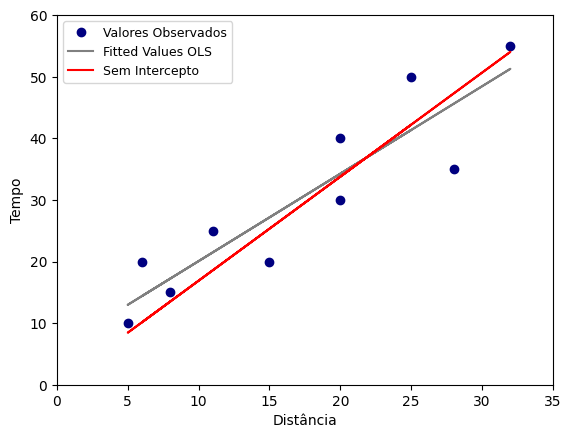

In [33]:
# In[1.25]: DECISÃO: DEVO ESCOLHER O MODELO COM INTERCEPTO!

# Definição das URLs das imagems
url1 = "https://cdn-icons-png.flaticon.com/512/5290/5290081.png"
url2 = "https://i.pinimg.com/originals/d3/82/6a/d3826a943b0d3a9d54ec3d3cba01d0ef.png"

# Carregamento das imagens das URLs
imagem1 = Image.open(urllib.request.urlopen(url1))
imagem2 = Image.open(urllib.request.urlopen(url2))

# Definição das dimensões e das posições desejadas das imagens
nova_largura1 = 600  # Largura da imagem 1 redimensionada
nova_altura1 = 800  # Altura da imagem 1 redimensionada
posicao_x1 = 1550  # Posição horizontal da imagem 1
posicao_y1 = 1370  # Posição vertical da imagem 1

nova_largura2 = 500  # Largura da imagem 2 redimensionada
nova_altura2 = 500  # Altura da imagem 2 redimensionada
posicao_x2 = 2000  # Posição horizontal da imagem 2
posicao_y2 = 700  # Posição vertical da imagem 2

# Redimensionamento das imagens
imagem_redimensionada1 = imagem1.resize((nova_largura1, nova_altura1))
imagem_redimensionada2 = imagem2.resize((nova_largura2, nova_altura2))

# Construção do gráfico
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)

# Inserção das imagens redimensionadas em posições específicas no gráfico
plt.figimage(imagem_redimensionada1, posicao_x1, posicao_y1, zorder=1)
plt.figimage(imagem_redimensionada2, posicao_x2, posicao_y2, zorder=1)

plt.show()

In [34]:
# In[EXEMPLO 2]:
#############################################################################
#                         REGRESSÃO LINEAR MÚLTIPLA                         #
#                 EXEMPLO 2 - CARREGAMENTO DA BASE DE DADOS                 #
#############################################################################

df_paises = pd.read_csv('data/paises.csv', delimiter=',', encoding="utf-8")
df_paises.head()

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,4.0,59,35.0


Dicionário de Dados:
- cpi - *corruption percption indice* - índice de percepção da corrupção. Quanto mais baixo, mais alta a percepção de corrupção do país.
- idade - idade média dos bilionarios do país.
- horas - média de horas trabalhadas por semana englobando toda a força trabalhadora - fonte: organização internacional do trabalho.


In [35]:
#Características das variáveis do dataset
df_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [36]:
#Estatísticas univariadas
df_paises.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.800000
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.100000


In [37]:
# In[2.1]: Gráfico 3D com scatter gerado em HTML e aberto no browser
#(figura 'EXEMPLO2_scatter3D.html' salva na pasta do curso)

trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 8,
        'color': 'darkorchid',
        'opacity': 0.7,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=500,
    height=500,
    plot_bgcolor='white',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        )
    )
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene=dict(
    xaxis_title='horas',
    yaxis_title='idade',
    zaxis_title='cpi'
))

# plot_figure.write_html('EXEMPLO2_scatter3D.html')

# # Abre o arquivo HTML no browser
# import webbrowser
# webbrowser.open('EXEMPLO2_scatter3D.html')

plot_figure.show()

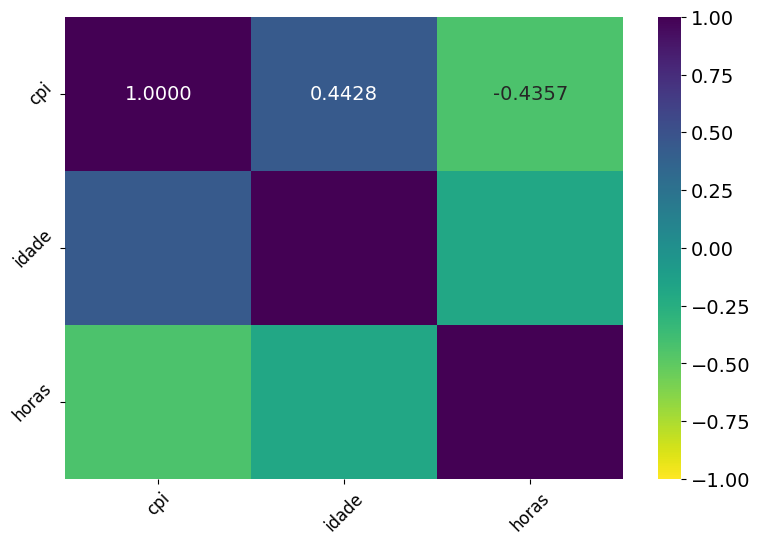

In [38]:
# In[2.2]: Matriz de correlações

correlation_matrix = df_paises.iloc[:,1:4].corr()
correlation_matrix

# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(9,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 14}, vmin=-1, vmax=1) 
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=45)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.show()

# Paletas de cores ('_r' reverte a sequência de cores):
# viridis
# inferno
# magma
# cividis
# coolwarm
# Blues
# Greens
# Reds

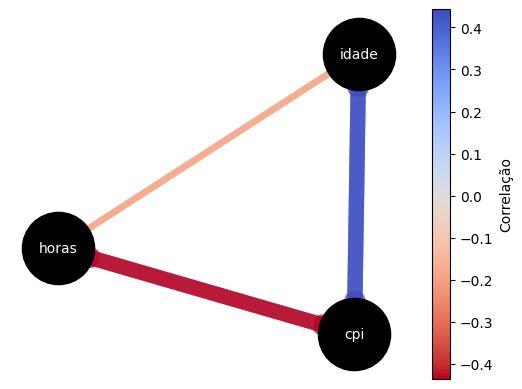

In [39]:
# In[2.3]: Diagrama interessante (grafo) que mostra a inter-relação entre as
#variáveis e a magnitude das correlações entre elas

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in correlation_matrix.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(correlation_matrix.columns):
    for j, variable2 in enumerate(correlation_matrix.columns):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 25 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Exibição do gráfico

plt.show()


In [40]:
# In[2.4]: Matriz de correlações mais elaborada, com uso da função 'rcorr' do
#pacote 'pingouin'

correlation_matrix2 = pg.rcorr(df_paises, method='pearson',
                               upper='pval', decimals=6,
                               pval_stars={0.01: '***',
                                           0.05: '**',
                                           0.10: '*'})
correlation_matrix2

,cpi,idade,horas
cpi,-,***,***
idade,0.442838,-,
horas,-0.435724,-0.191748,-


<Figure size 2000x1000 with 0 Axes>

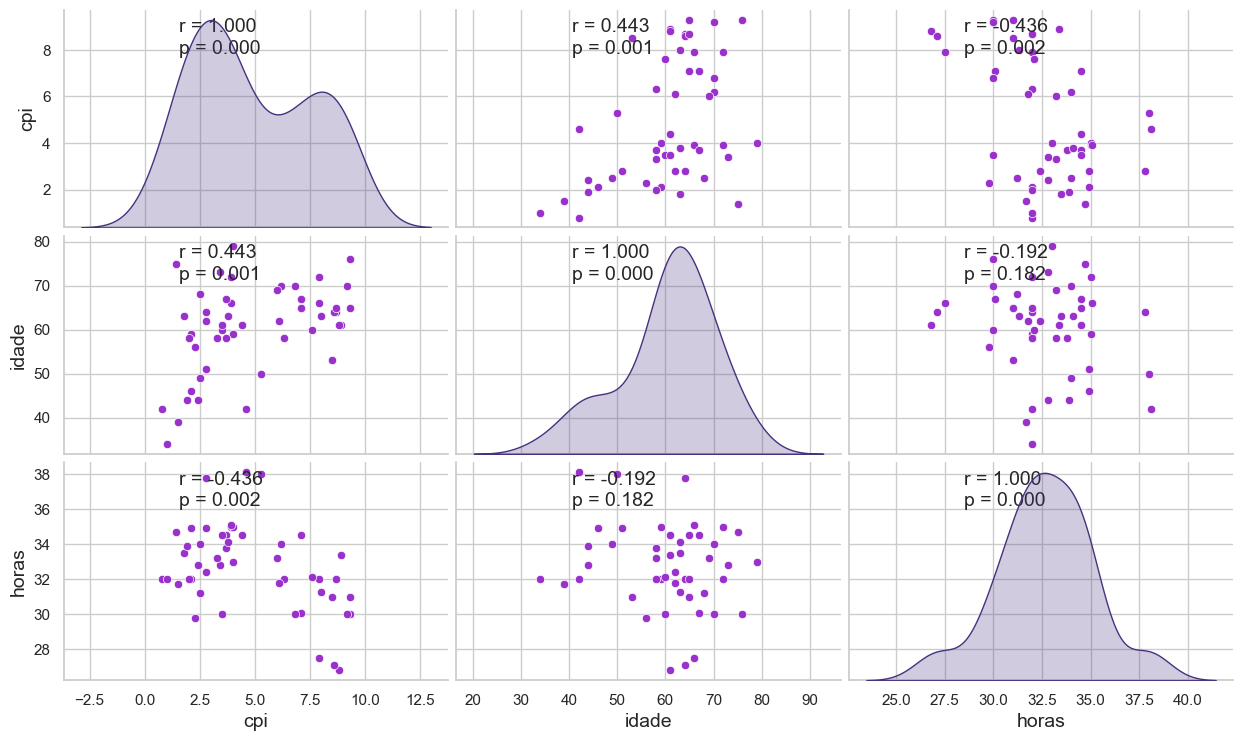

In [41]:
# In[2.5]: Gráfico com distribuições das variáveis, scatters, valores das
#correlações e respectivas significâncias estatísticas

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.30, .9), xycoords=ax.transAxes, fontsize=14)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.30, .8), xycoords=ax.transAxes, fontsize=14)

# Configuração do gráfico
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(20,10))
graph = sns.pairplot(df_paises, diag_kind="kde", plot_kws={"color": "darkorchid"},
                     height=2.5, aspect=1.7)
graph.map(corrfunc)
for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
plt.show()

In [42]:
# In[2.6]: Estimação de um modelo de regressão múltipla com as variáveis do
#dataframe 'df_paises'

# Estimando o modelo de regressão múltipla por OLS
modelo_paises = sm.OLS.from_formula("cpi ~ idade + horas", df_paises).fit()

# Parâmetros do 'modelo_paises'
print(modelo_paises.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           0.000101
Time:                        17:01:22   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9719      5.165      2.318      0.0

In [43]:
# Cálculo do R² ajustado (slide 31 da apostila)
r2_ajust = 1-((len(df_paises.index)-1)/(len(df_paises.index)-\
                                          modelo_paises.params.count()))*\
    (1-modelo_paises.rsquared)
r2_ajust # modo direto: modelo_paises.rsquared_adj

0.295099700531963

In [44]:
# modo direto: 
modelo_paises.rsquared_adj

0.295099700531963

Objetivo do R^2 ajustado: Comparar modelos com quantidades distintas de parâmetros, variáveis ou observações!

In [45]:
# In[2.7]: Salvando os fitted values na base de dados

df_paises['cpifit'] = modelo_paises.fittedvalues
df_paises.head()

,pais,cpi,idade,horas,cpifit
0,Argentina,3.9,72,35.0,5.103394
1,Australia,8.7,64,32.0,5.509820
2,Austria,7.9,72,32.0,6.307405
3,Belgium,7.1,67,30.1,6.571454
4,Brazil,4.0,59,35.0,3.807319


In [46]:
# In[2.8]: Gráfico 3D com scatter e fitted values (superfície espacial)
#resultantes do 'modelo_paises', gerado em HTML e aberto no browser
#(figura 'EXEMPLO2_scatter3D_fitted.html' salva na pasta do curso)

trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 8,
        'color': 'darkorchid',
        'opacity': 0.7,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=500,
    height=500,
    plot_bgcolor='white',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        )
    )
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_paises['horas'], 
                    y=df_paises['idade'], 
                    z=df_paises['cpifit'], 
                    opacity=0.5,
                    color='orange'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))

# plot_figure.write_html('EXEMPLO2_scatter3D_fitted.html')

# # Abre o arquivo HTML no browser
# import webbrowser
# webbrowser.open('EXEMPLO2_scatter3D_fitted.html')

plot_figure.show()

OBS: O modelo de rgressão múltiplo é um hiperplano e não uma reta!

In [47]:
# In[EXEMPLO 3]:
#############################################################################
#         REGRESSÃO COM UMA VARIÁVEL EXPLICATIVA (X) QUALITATIVA            #
#               EXEMPLO 3 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################

df_corrupcao = pd.read_csv('data/corrupcao.csv',delimiter=',',encoding='utf-8')
df_corrupcao.head()

,pais,cpi,regiao
0,Argentina,3.9,America_do_sul
1,Australia,8.7,Oceania
2,Austria,7.9,Europa
3,Belgium,7.1,Europa
4,Brazil,4.0,America_do_sul


In [48]:
# Características das variáveis do dataset
df_corrupcao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   regiao  50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [49]:
# Estatísticas univariadas
df_corrupcao.describe()

,cpi
count,50.000000
mean,4.894000
std,2.678974
min,0.800000
25%,2.575000
50%,3.950000
75%,7.475000
max,9.300000


In [50]:
# Estatísticas univariadas por região
df_corrupcao.groupby('regiao').describe()

cpi                                                  
               count      mean       std  min    25%   50%    75%  max
regiao                                                                
America_do_sul   5.0  4.180000  1.237740  2.8  3.900  4.00  4.000  6.2
Asia            17.0  2.329412  0.898446  0.8  1.800  2.30  2.800  3.8
EUA_e_Canada     2.0  8.000000  1.272792  7.1  7.550  8.00  8.450  8.9
Europa          24.0  6.258333  2.272504  2.1  4.275  6.55  8.125  9.3
Oceania          2.0  9.000000  0.424264  8.7  8.850  9.00  9.150  9.3

In [51]:
# In[3.1]: Tabela de frequências da variável 'regiao'

# Função 'value_counts' do pacote 'pandas' sem e com o argumento 'normalize'
# para gerar, respectivamente, as contagens e os percentuais
contagem = df_corrupcao['regiao'].value_counts(dropna=False)
percent = df_corrupcao['regiao'].value_counts(dropna=False, normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=False)

,contagem,%
regiao,,
Europa,24,0.48
Asia,17,0.34
America_do_sul,5,0.10
Oceania,2,0.04
EUA_e_Canada,2,0.04


In [52]:
# In[3.2]: Conversão dos dados de 'regiao' para dados numéricos, a fim de
#se mostrar a estimação de modelo com o problema da ponderação arbitrária

label_encoder = LabelEncoder()
df_corrupcao['regiao_numerico'] = label_encoder.fit_transform(df_corrupcao['regiao'])
df_corrupcao['regiao_numerico'] = df_corrupcao['regiao_numerico'] + 1
df_corrupcao.head(10)

,pais,cpi,regiao,regiao_numerico
0,Argentina,3.9,America_do_sul,1
1,Australia,8.7,Oceania,5
2,Austria,7.9,Europa,4
3,Belgium,7.1,Europa,4
4,Brazil,4.0,America_do_sul,1
5,Canada,8.9,EUA_e_Canada,3
6,Chile,6.2,America_do_sul,1
7,China,2.5,Asia,2
8,Colombia,4.0,America_do_sul,1
9,Cyprus,6.3,Europa,4


ERRADO! QUALI VIRANDO QUANT (erro grosseiro) -> não pode atribuir labels para variáveis qualitativas

In [53]:
# A nova variável 'regiao_numerico' é quantitativa (ERRO!), fato que
#caracteriza a ponderação arbitrária!
df_corrupcao['regiao_numerico'].info()
df_corrupcao.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: regiao_numerico
Non-Null Count  Dtype
--------------  -----
50 non-null     int32
dtypes: int32(1)
memory usage: 328.0 bytes


,cpi,regiao_numerico
count,50.000000,50.000000
mean,4.894000,3.020000
std,2.678974,1.186489
min,0.800000,1.000000
25%,2.575000,2.000000
50%,3.950000,4.000000
75%,7.475000,4.000000
max,9.300000,5.000000


In [54]:
# In[3.3]: Modelando com a variável preditora numérica, resultando na
# estimação ERRADA dos parâmetros
# PONDERAÇÃO ARBITRÁRIA!
modelo_corrupcao_errado = sm.OLS.from_formula("cpi ~ regiao_numerico",
                                              df_corrupcao).fit()

# Parâmetros do 'modelo_corrupcao_errado'
print(modelo_corrupcao_errado.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     33.56
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           5.19e-07
Time:                        17:01:22   Log-Likelihood:                -106.46
No. Observations:                  50   AIC:                             216.9
Df Residuals:                      48   BIC:                             220.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5200      0.810     

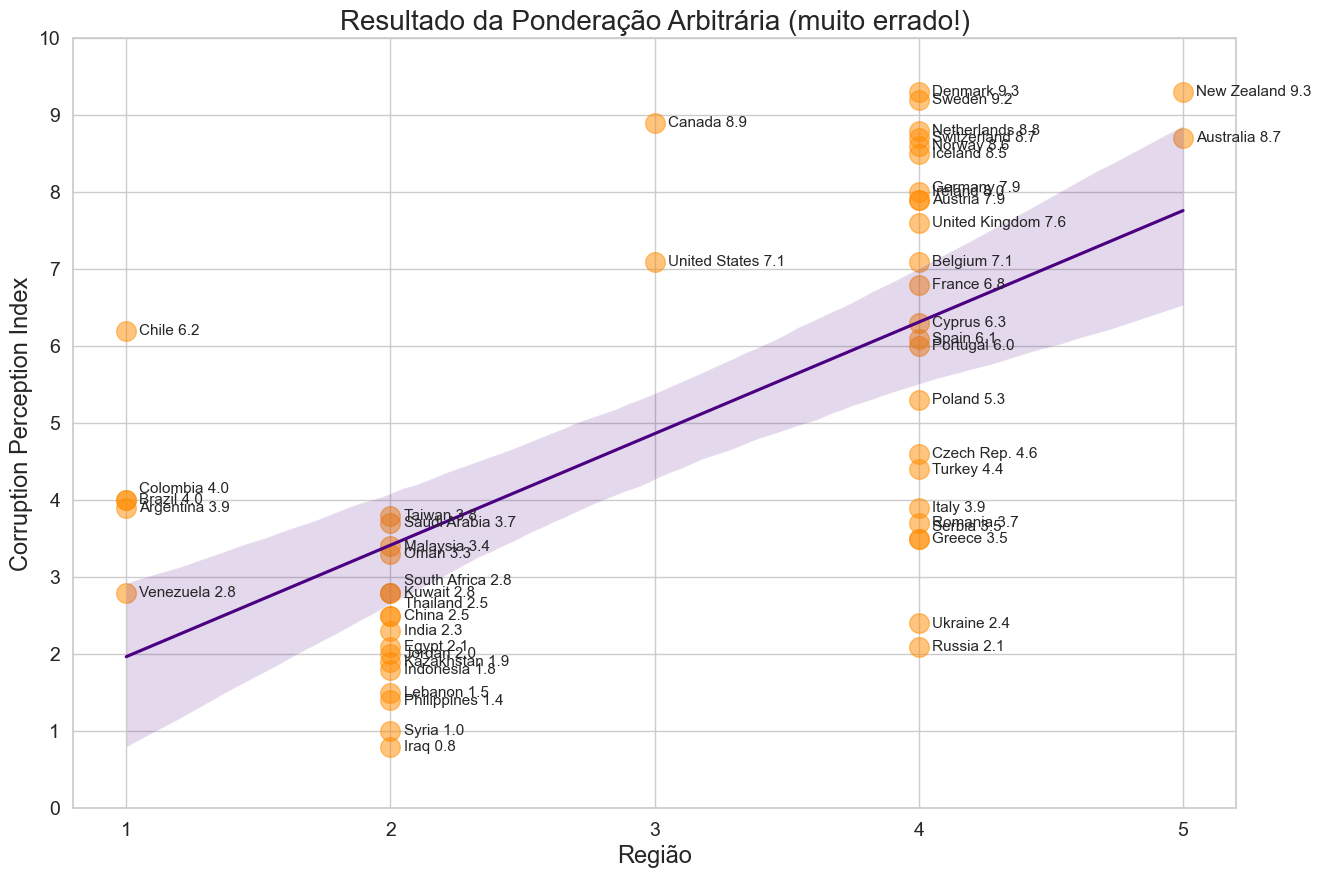

In [55]:
# In[3.4]: Plotando os fitted values do 'modelo_corrupcao_errado' considerando,
#PROPOSITALMENTE, a ponderação arbitrária, ou seja, assumindo que as regiões
#representam valores numéricos (América do Sul = 1; Ásia = 2; EUA e Canadá = 3;
#Europa = 4; Oceania = 5).

plt.figure(figsize=(15,10))

ax =sns.regplot(
    data=df_corrupcao,
    x="regiao_numerico", y="cpi",
    scatter_kws={"s": 200, "color": "darkorange", "alpha": 0.5},
    line_kws={"color": "indigo"}
)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        offset = 0
        while ax.texts:
            overlapping = False
            for text in ax.texts:
                overlapping |= text.get_position()[0] == (point['x'] + 0.05) and text.get_position()[1] == (point['y'] - 0.05 + offset)
            if overlapping:
                offset += 0.15
            else:
                break
        ax.annotate(str(point['val']) + " " + str(point['y']),
                    (point['x'] + 0.05,
                     point['y'] - 0.05 + offset),
                    fontsize=11)
                
plt.title('Resultado da Ponderação Arbitrária (muito errado!)', fontsize=20)
plt.xlabel('Região', fontsize=17)
plt.ylabel('Corruption Perception Index', fontsize=17)
plt.xticks(range(1, 6, 1), fontsize=14)
plt.yticks(range(0, 11, 1), fontsize=14)
label_point(x = df_corrupcao['regiao_numerico'],
            y = df_corrupcao['cpi'],
            val = df_corrupcao['pais'],
            ax = plt.gca())
plt.show()

Tratamento correto = dummies

In [56]:
# In[3.5]: Dummizando a variável 'regiao'. O código abaixo automaticamente fará:
# a) o estabelecimento de dummies que representarão cada uma das regiões do dataset;
# b) removerá a variável original a partir da qual houve a dummização;
# c) estabelecerá como categoria de referência a primeira categoria, ou seja,
#a categoria 'America_do_sul' por meio do argumento 'drop_first=True'.

df_corrupcao_dummies = pd.get_dummies(df_corrupcao, columns=['regiao'],
                                      dtype=int,
                                      drop_first=True)

df_corrupcao_dummies.head()

,pais,cpi,regiao_numerico,regiao_Asia,regiao_EUA_e_Canada,regiao_Europa,regiao_Oceania
0,Argentina,3.9,1,0,0,0,0
1,Australia,8.7,5,0,0,0,1
2,Austria,7.9,4,0,0,1,0
3,Belgium,7.1,4,0,0,1,0
4,Brazil,4.0,1,0,0,0,0


In [57]:
# A variável 'regiao' estava inicialmente definida como 'object' no dataframe
#original 'df_corrupcao'
df_corrupcao['regiao'].info()

# Este procedimento de dummização também poderia ter sido realizado em uma
#variável do tipo 'category' ou 'string'!

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: regiao
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [58]:
# In[3.6]: Estimação do modelo de regressão múltipla com n-1 dummies

modelo_corrupcao_dummies = sm.OLS.from_formula("cpi ~ regiao_Asia + \
                                              regiao_EUA_e_Canada + \
                                              regiao_Europa + \
                                              regiao_Oceania",
                                              df_corrupcao_dummies).fit()

# Parâmetros do 'modelo_corrupcao_dummies'
print(modelo_corrupcao_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.37e-08
Time:                        17:01:23   Log-Likelihood:                -96.620
No. Observations:                  50   AIC:                             203.2
Df Residuals:                      45   BIC:                             212.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1800    

In [59]:
# In[3.7]: Outro método de estimação (sugestão de uso para muitas dummies no dataset)

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_corrupcao_dummies.drop(columns=['cpi','pais',
                                                        'regiao_numerico']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "cpi ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

Fórmula utilizada:  cpi ~ regiao_Asia + regiao_EUA_e_Canada + regiao_Europa + regiao_Oceania


In [60]:
# Estimação
modelo_corrupcao_dummies = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_corrupcao_dummies).fit()

# Parâmetros do 'modelo_corrupcao_dummies'
print(modelo_corrupcao_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.37e-08
Time:                        17:01:23   Log-Likelihood:                -96.620
No. Observations:                  50   AIC:                             203.2
Df Residuals:                      45   BIC:                             212.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1800    

In [61]:
# In[3.8]: Plotando o 'modelo_corrupcao_dummies' de forma interpolada

# Fitted values do 'modelo_corrupcao_dummies' no dataset 'df_corrupcao_dummies'
df_corrupcao_dummies['fitted'] = modelo_corrupcao_dummies.fittedvalues
df_corrupcao_dummies.head()

,pais,cpi,regiao_numerico,regiao_Asia,regiao_EUA_e_Canada,regiao_Europa,regiao_Oceania,fitted
0,Argentina,3.9,1,0,0,0,0,4.180000
1,Australia,8.7,5,0,0,0,1,9.000000
2,Austria,7.9,4,0,0,1,0,6.258333
3,Belgium,7.1,4,0,0,1,0,6.258333
4,Brazil,4.0,1,0,0,0,0,4.180000


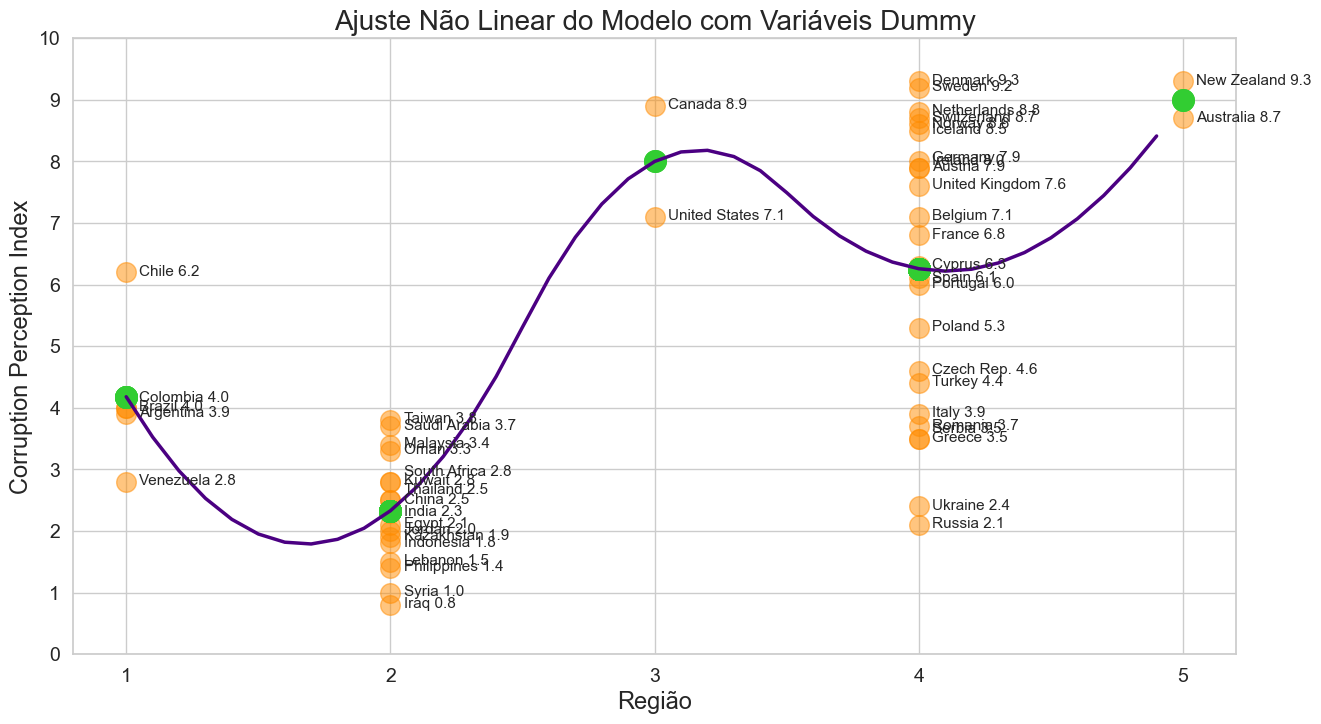

In [62]:
# In[3.9]: Gráfico propriamente dito

plt.figure(figsize=(15,8))

df2 = df_corrupcao_dummies[['regiao_numerico',
                            'fitted']].groupby(['regiao_numerico']).median().reset_index()
x = df2['regiao_numerico']
y = df2['fitted']

tck = interpolate.splrep(x, y, k=2)
xnew = np.arange(1, 5, 0.1)
ynew = interpolate.splev(xnew, tck, der=0)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        offset = 0
        while ax.texts:
            overlapping = False
            for text in ax.texts:
                overlapping |= text.get_position()[0] == (point['x'] + 0.05) and text.get_position()[1] == (point['y'] - 0.05 + offset)
            if overlapping:
                offset += 0.15
            else:
                break
        ax.annotate(str(point['val']) + " " + str(point['y']),
                    (point['x'] + 0.05,
                     point['y'] - 0.05 + offset),
                    fontsize=11)

plt.scatter(df_corrupcao_dummies['regiao_numerico'],
            df_corrupcao_dummies['cpi'], color='darkorange', s=200, alpha=0.5)
plt.scatter(df_corrupcao_dummies['regiao_numerico'],
            df_corrupcao_dummies['fitted'], color='limegreen', s=240)
plt.plot(xnew, ynew, color='indigo', linewidth=2.5)
plt.title('Ajuste Não Linear do Modelo com Variáveis Dummy', fontsize=20)
plt.xlabel('Região', fontsize=17)
plt.ylabel('Corruption Perception Index', fontsize=17)
plt.xticks(range(1, 6, 1), fontsize=14)
plt.yticks(range(0, 11, 1), fontsize=14)
label_point(x=df_corrupcao_dummies['regiao_numerico'],
            y=df_corrupcao_dummies['cpi'],
            val=df_corrupcao_dummies['pais'],
            ax=plt.gca())
plt.show()

In [63]:
# In[3.10]: Gráfico gerado em HTML e aberto no browser, com interação
#(figura 'EXEMPLO3.html' salva na pasta do curso)

df2 = df_corrupcao_dummies[['regiao_numerico',
                            'fitted']].groupby(['regiao_numerico']).median().reset_index()
x = df2['regiao_numerico']
y = df2['fitted']

tck = interpolate.splrep(x, y, k=2)
xnew = np.arange(1, 5, 0.1)
ynew = interpolate.splev(xnew, tck, der=0)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_corrupcao_dummies['regiao_numerico'],
    y=df_corrupcao_dummies['cpi'],
    mode='markers',
    name='CPI',
    marker=dict(color='darkorange', size=14, opacity=0.5)
))

fig.add_trace(go.Scatter(
    x=df_corrupcao_dummies['regiao_numerico'],
    y=df_corrupcao_dummies['fitted'],
    mode='markers',
    name='Fitted',
    marker=dict(color='limegreen', size=17)
))

fig.add_trace(go.Scatter(
    x=xnew,
    y=ynew,
    mode='lines',
    name='Interpolated',
    line=dict(color='indigo', width=3.5)
))

fig.update_layout(title={
        'text': 'Ajuste Não Linear do Modelo com Variáveis Dummy',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(title='Região'),
    yaxis=dict(title='Corruption Perception Index'),
    xaxis_tickvals=list(range(1, 6)),
    yaxis_tickvals=list(range(0, 11)),
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    template='plotly_white')

for i in range(len(df_corrupcao_dummies)):
    fig.add_annotation(
        x=df_corrupcao_dummies['regiao_numerico'][i],
        y=df_corrupcao_dummies['cpi'][i],
        text=str(df_corrupcao_dummies['pais'][i]) + ' ' + str(df_corrupcao_dummies['cpi'][i]),
        showarrow=False,
        font=dict(size=11, color='black'),
        xshift=50,
        yshift=0,
        textangle=0
    )

fig.update_annotations(dict(xref="x", yref="y"))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# fig.write_html('EXEMPLO3.html')

# # Abre o arquivo HTML no browser
# import webbrowser
# webbrowser.open('EXEMPLO3.html')

fig.show()

In [2]:
# In[EXEMPLO 4]:
#############################################################################
#            REGRESSÃO NÃO LINEAR E TRANSFORMAÇÃO DE BOX-COX                #
#               EXEMPLO 4 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################

df_bebes = pd.read_csv('data/bebes.csv', delimiter=',')
df_bebes.head()

,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25


In [65]:
# Características das variáveis do dataset
df_bebes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [66]:
# Estatísticas univariadas
df_bebes.describe()

,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


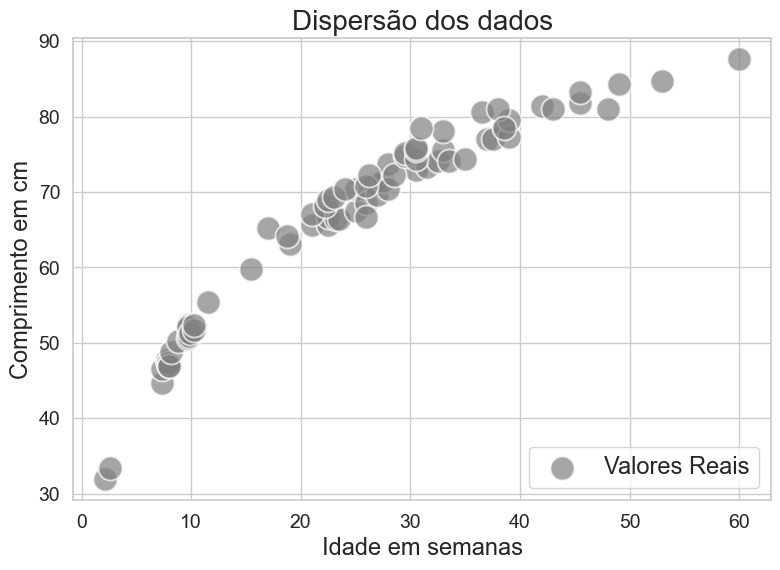

In [67]:
# In[4.1]: Gráfico de dispersão

plt.figure(figsize=(9,6))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
                s=300, label='Valores Reais', alpha=0.7)
plt.title('Dispersão dos dados', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

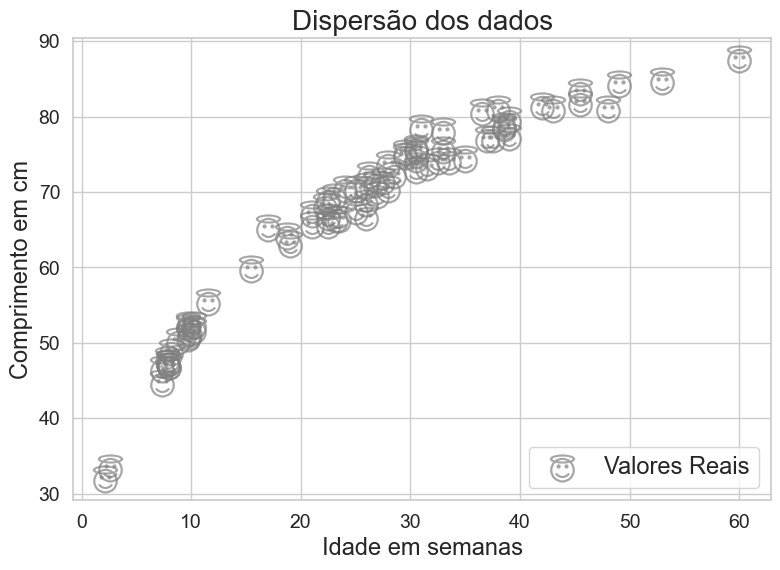

In [68]:
# In[4.2]: Gráfico de dispersão com emojis 01

plt.figure(figsize=(9,6))
plt.scatter(x="idade", y="comprimento", data=df_bebes, color='grey',
            s=400, label='Valores Reais', alpha=0.7, marker='$\U0001F607$',
            linewidth=0.2)
plt.title('Dispersão dos dados', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

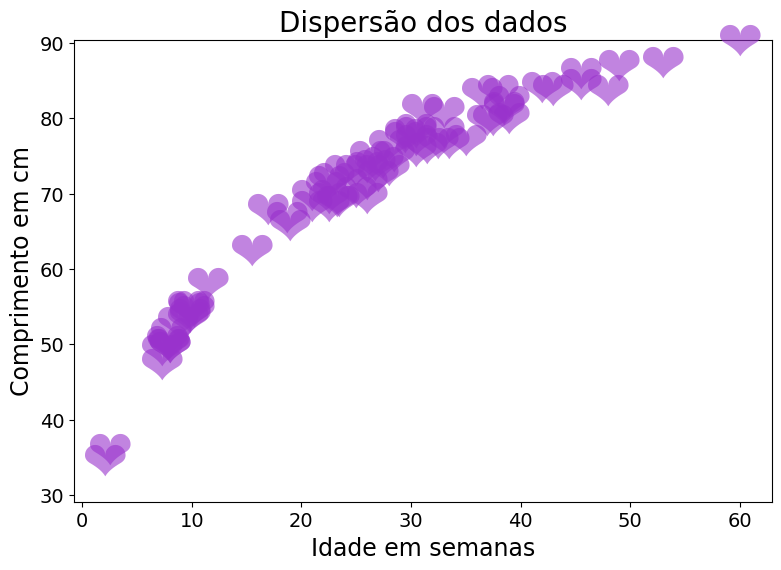

In [3]:
# In[4.3]: Gráfico de dispersão com emojis 02

emojis_coracao = ['❤️'] * len(df_bebes)

plt.figure(figsize=(9,6))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='none',
                s=0, label=None)
for i, emoji in enumerate(emojis_coracao):
    plt.text(df_bebes['idade'][i], df_bebes['comprimento'][i], emoji,
             fontsize=40, ha='center', alpha=0.6, color='darkorchid')
plt.title('Dispersão dos dados', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
# In[4.4]: Estimação de um modelo OLS linear
modelo_linear = sm.OLS.from_formula('comprimento ~ idade', df_bebes).fit()

# Parâmetros do 'modelo_linear'
print(modelo_linear.summary())

                            OLS Regression Results                            
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           3.72e-38
Time:                        22:02:56   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.0

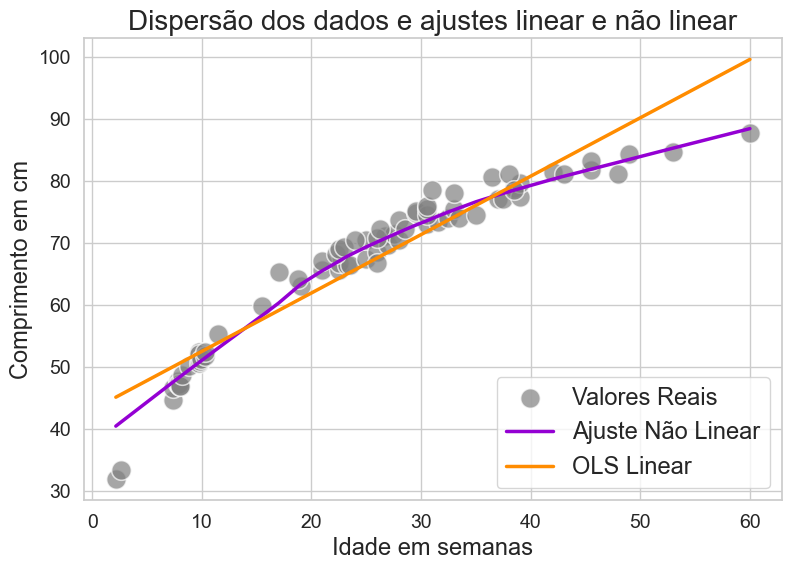

In [71]:
# In[4.5]: Gráfico de dispersão com ajustes (fits) linear e não linear
# com argumento 'lowess=True' (locally weighted scatterplot smoothing)

plt.figure(figsize=(9,6))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
                s=200, label='Valores Reais', alpha=0.7)
sns.regplot(x="idade", y="comprimento", data=df_bebes, lowess=True,
            color='darkviolet', ci=False, scatter=False, label='Ajuste Não Linear',
            line_kws={'linewidth': 2.5})
sns.regplot(x="idade", y="comprimento", data=df_bebes,
            color='darkorange', ci=False, scatter=False, label='OLS Linear',
            line_kws={'linewidth': 2.5})
plt.title('Dispersão dos dados e ajustes linear e não linear', fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [5]:
# In[4.6]: Teste de verificação da aderência dos resíduos à normalidade ao supor linearidade

# Teste de Shapiro-Wilk (n < 30)
# from scipy.stats import shapiro
# shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Carregamento da função 'shapiro_francia' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_linear.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade - o modelo é linear')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade - o modelo não é linear')

method  :  Shapiro-Francia normality test
statistics W  :  0.9087044262594457
statistics z  :  3.6276504915453827
p-value  :  0.00014300603555437503
Statistics W=0.90870, p-value=0.000143
Rejeita-se H0 - Distribuição não aderente à normalidade - o modelo não é linear


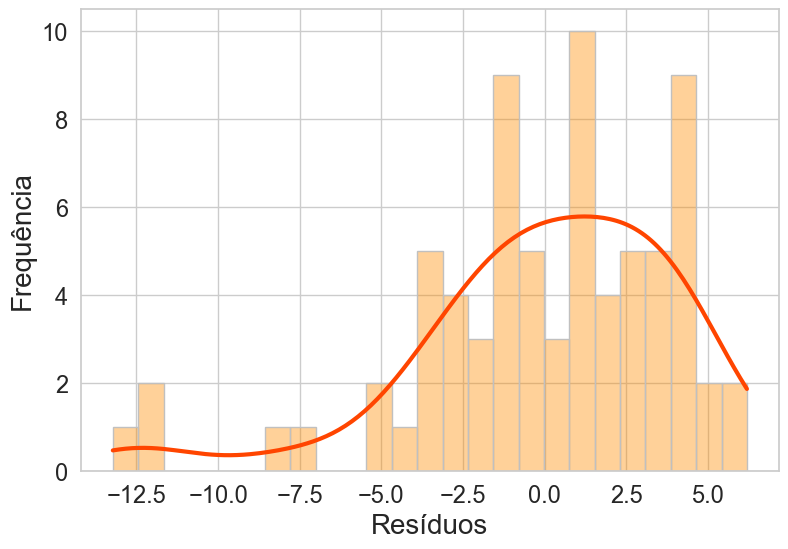

In [73]:
# In[4.7]: Histograma dos resíduos do modelo OLS linear - erros

plt.figure(figsize=(9,6))
hist1 = sns.histplot(data=modelo_linear.resid, kde=True, bins=25,
                     color = 'darkorange', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Resíduos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [6]:
# In[4.8]: Transformação de Box-Cox

# Para o cálculo do lambda de Box-Cox
# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_bebes['comprimento'])

print("yast:", yast)
print("lambda:", lmbda)

yast: [22966.08319266 25529.06530947 25529.06530947 26682.72235641
 26301.65766765 26301.65766765 27476.79450787 30765.07407946
 28684.15095262 31620.66906723 29924.07224715 32059.93131064
 30765.07407946 34750.41043352 33842.64966853 34288.43897334
 35216.24573529 37092.3575972  40543.84598029 35216.24573529
 35673.21165411 39043.09284154 39043.09284154 41559.36641393
 39543.9519245  42604.84555949 45260.30471222 44715.31779261
 45809.41699283 48016.67910291 44715.31779261 49722.69880743
 50304.91403548 55065.96868877  3748.74498312  4225.87397722
  9210.48000062 10252.66992246 10909.32359537 10685.60834947
 10685.60834947 10464.77767711 10464.77767711 11591.60380622
 12537.41953573 12784.49879781 14051.16270452 13796.07105628
 13034.59373721 13280.83768202 13536.92500662 14051.16270452
 16244.97911632 19907.86652792 25158.39326205 24046.65215361
 27077.94234676 28274.42265998 29086.34179069 29503.35190726
 30765.07407946 26682.72235641 31196.90175333 32937.70390231
 32937.70390231 36

**Modelos não lineares e transformações de Box-Cox**

- Especificação Linear \($ \lambda $ = 1\)
- Especificação Quadrática \($ \lambda $ = 2\)
- Especificação Cúbica \($ \lambda $ = 3\)
- Especificação de Raiz \($ \lambda $ = 0,5\)
- Especificação Inversa \($ \lambda $ = -1\)
- Especificação Semilogarítmica \($ \lambda $ = 0\); Expansão de Taylor

In [7]:
# Inserção da variável transformada ('bc_comprimento') no dataset para a
#estimação de um novo modelo
df_bebes['bc_comprimento'] = yast

df_bebes.head()

,comprimento,idade,bc_comprimento
0,63.07,19.00,22966.083193
1,65.63,21.00,25529.065309
2,65.63,22.50,25529.065309
3,66.73,22.50,26682.722356
4,66.37,23.25,26301.657668


In [9]:
# Verificação do cálculo, apenas para fins didáticos
df_bebes['bc_comprimento2'] = ((df_bebes['comprimento']**lmbda)-1)/lmbda

df_bebes.head() # igual -> ok!

,comprimento,idade,bc_comprimento,bc_comprimento2
0,63.07,19.00,22966.083193,22966.083193
1,65.63,21.00,25529.065309,25529.065309
2,65.63,22.50,25529.065309,25529.065309
3,66.73,22.50,26682.722356,26682.722356
4,66.37,23.25,26301.657668,26301.657668


In [10]:
del df_bebes['bc_comprimento2']

In [11]:
# In[4.9]: Estimando um novo modelo OLS com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_comprimento ~ idade', df_bebes).fit()

# Parâmetros do 'modelo_bc'
print(modelo_bc.summary())

                            OLS Regression Results                            
Dep. Variable:         bc_comprimento   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           7.16e-53
Time:                        21:59:33   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1602    630.253      7.926      0.0

In [14]:
# In[4.10]: Comparando os parâmetros do 'modelo_linear' com os do 'modelo_bc'

# CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

summary_col([modelo_linear, modelo_bc])

,comprimento,bc_comprimento
Intercept,43.1004,4995.1602
,(1.0345),(630.2528)
idade,0.9411,947.2298
,(0.0364),(22.1889)
R-squared,0.9027,0.9620
R-squared Adj.,0.9013,0.9615


In [15]:
# Outro modo mais completo também pela função 'summary_col'
summary_col([modelo_linear, modelo_bc],
            model_names=["MODELO LINEAR","MODELO BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

# Repare que há um salto na qualidade do ajuste para o modelo não linear (R²)

,MODELO LINEAR,MODELO BOX-COX
Intercept,43.1004***,4995.1602***
,(1.0345),(630.2528)
idade,0.9411***,947.2298***
,(0.0364),(22.1889)
R-squared,0.9027,0.9620
R-squared Adj.,0.9013,0.9615
N,74,74


In [16]:
pd.DataFrame({'R² OLS':[round(modelo_linear.rsquared,4)],
              'R² Box-Cox':[round(modelo_bc.rsquared,4)]})

,R² OLS,R² Box-Cox
0,0.9027,0.962


In [17]:
# In[4.11]: Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9729952103345907
statistics z  :  1.2666151749155392
p-value  :  0.1026464618655501
Statistics W=0.97300, p-value=0.102646
Não se rejeita H0 - Distribuição aderente à normalidade


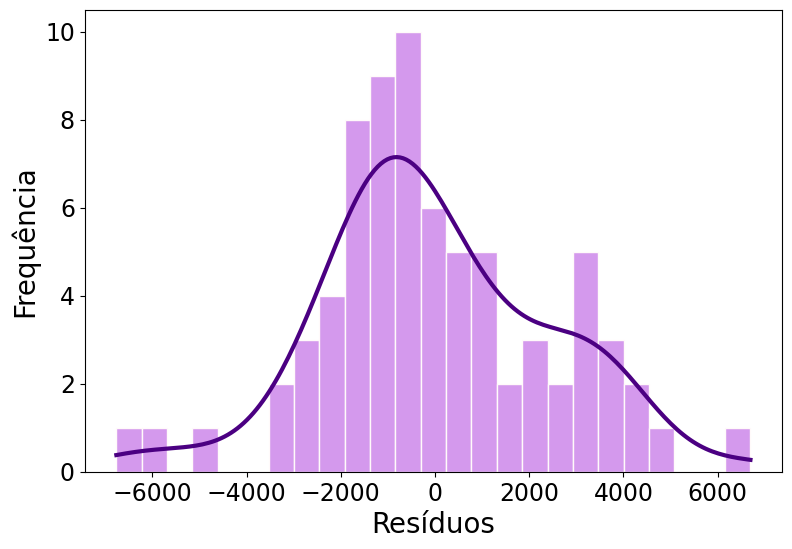

In [18]:
# In[4.12]: Histograma dos resíduos do modelo_bc

plt.figure(figsize=(9,6))
hist2 = sns.histplot(data=modelo_bc.resid, kde=True, bins=25,
                     color='darkviolet', alpha=0.4, edgecolor='snow',
                     line_kws={'linewidth': 3})
hist2.get_lines()[0].set_color('indigo')
plt.xlabel('Resíduos', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [19]:
# In[4.13]: Fazendo predições com os modelos OLS linear e Box-Cox
# Qual é o comprimento esperado de um bebê com 52 semanas de vida?

# Modelo OLS Linear:
modelo_linear.predict(pd.DataFrame({'idade':[52]}))

0    92.037486
dtype: float64

In [20]:
# Modelo Não Linear (Box-Cox):
modelo_bc.predict(pd.DataFrame({'idade':[52]})) # ERRADO

0    54251.109775
dtype: float64

In [21]:
# Não podemos nos esquecer de fazer o cálculo inverso para a obtenção do fitted
#value de Y (variável 'comprimento')
(54251.109775 * lmbda + 1) ** (1 / lmbda) # CORRETO

87.14006473485827

In [22]:
# In[4.14]: Salvando os fitted values dos dois modelos (modelo_linear e modelo_bc)
#no dataset 'bebes'

df_bebes['yhat_linear'] = modelo_linear.fittedvalues
df_bebes['yhat_modelo_bc'] = (modelo_bc.fittedvalues * lmbda + 1) ** (1 / lmbda) # necessário fazer a transformada inversa para obtenção dos valores reais
df_bebes.head()

,comprimento,idade,bc_comprimento,yhat_linear,yhat_modelo_bc
0,63.07,19.00,22966.083193,60.981260,63.097300
1,65.63,21.00,25529.065309,62.863455,65.004303
2,65.63,22.50,25529.065309,64.275102,66.375858
3,66.73,22.50,26682.722356,64.275102,66.375858
4,66.37,23.25,26301.657668,64.980925,67.044337


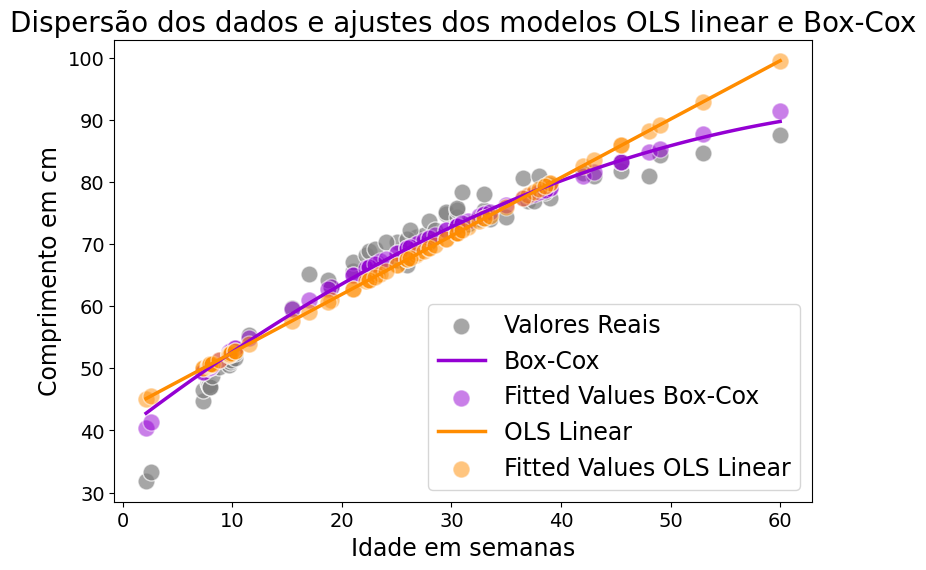

In [26]:
# In[4.15]: Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox

plt.figure(figsize=(9,6))
sns.scatterplot(x="idade", y="comprimento", data=df_bebes, color='grey',
                s=150, label='Valores Reais', alpha=0.7)
sns.regplot(x="idade", y="yhat_modelo_bc", data=df_bebes, order=lmbda,
            color='darkviolet', ci=False, scatter=False, label='Box-Cox',
            line_kws={'linewidth': 2.5})
sns.scatterplot(x="idade", y="yhat_modelo_bc", data=df_bebes, color='darkviolet',
                s=150, label='Fitted Values Box-Cox', alpha=0.5)
sns.regplot(x="idade", y="yhat_linear", data=df_bebes,
            color='darkorange', ci=False, scatter=False, label='OLS Linear',
            line_kws={'linewidth': 2.5})
sns.scatterplot(x="idade", y="yhat_linear", data=df_bebes, color='darkorange',
                s=150, label='Fitted Values OLS Linear', alpha=0.5)
plt.title('Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox',
          fontsize=20)
plt.xlabel('Idade em semanas', fontsize=17)
plt.ylabel('Comprimento em cm', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# # In[4.16]: Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox,
# #com interação (figura 'EXEMPLO4.html' salva na pasta do curso)

# # Ajuste polinomial com grau igual a lambda (lmbda = 2.659051008426254)
# coefficients = np.polyfit(df_bebes["idade"], df_bebes["yhat_modelo_bc"], lmbda)
# x_range = np.linspace(df_bebes["idade"].min(), df_bebes["idade"].max(), 100)
# y_quadratic = np.polyval(coefficients, x_range)

# fig = go.Figure()

# fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["comprimento"],
#                          mode='markers',
#                          marker=dict(color='grey', opacity=0.7, size=20),
#                          name='Valores Reais'))

# fig.add_trace(go.Scatter(x=x_range, y=y_quadratic,
#                          mode='lines',
#                          line=dict(color='darkviolet', width=2),
#                          name='Box-Cox'))

# fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_modelo_bc"],
#                          mode='markers',
#                          marker=dict(color='darkviolet', opacity=0.5, size=15),
#                          name='Fitted Values Box-Cox',
#                          hovertemplate='Fitted Values Box-Cox: %{y:.2f}<extra></extra>'))

# fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_linear"],
#                          mode='lines',
#                          marker=dict(color='darkorange'),
#                          name='OLS Linear',
#                          hovertemplate='Fitted Values OLS Linear: %{y:.2f}<extra></extra>'))

# fig.add_trace(go.Scatter(x=df_bebes["idade"], y=df_bebes["yhat_linear"],
#                          mode='markers',
#                          marker=dict(color='darkorange', opacity=0.5, size=15),
#                          name='Fitted Values OLS Linear',
#                          hovertemplate='Fitted Values OLS Linear: %{y:.2f}<extra></extra>'))

# fig.update_layout(title={
#         'text': 'Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox',
#         'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
#         'x': 0.5,
#         'y': 0.95,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     },
#     xaxis_title='Idade em semanas',
#     yaxis_title='Comprimento em cm',
#     legend=dict(x=1.02, y=1),
#     template='plotly_white')

# fig.update_annotations(dict(xref="x", yref="y"))
# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# fig.write_html("EXEMPLO4.html")

# # Abre o arquivo HTML no browser
# import webbrowser
# webbrowser.open('EXEMPLO4.html')

In [2]:
# In[EXEMPLO 5]:
#############################################################################
#                        REGRESSÃO NÃO LINEAR MÚLTIPLA                      #
#                  EXEMPLO 5 - CARREGAMENTO DA BASE DE DADOS                #
#############################################################################

df_empresas = pd.read_csv('data/empresas.csv', delimiter=',')
df_empresas.head()

,empresa,retorno,disclosure,endividamento,ativos,liquidez
0,Adidas,63.67,83,1.3,3967,14.3
1,BASF,55.49,91,33.9,5450,16.8
2,Bayer,52.42,77,36.1,4327,15.5
3,BSH,54.00,90,20.8,4109,16.8
4,Bosch,68.01,93,14.1,4458,17.0


In [3]:
# Características das variáveis do dataset
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   empresa        124 non-null    object 
 1   retorno        124 non-null    float64
 2   disclosure     124 non-null    int64  
 3   endividamento  124 non-null    float64
 4   ativos         124 non-null    int64  
 5   liquidez       124 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.9+ KB


In [4]:
# Estatísticas univariadas
df_empresas.describe()

,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


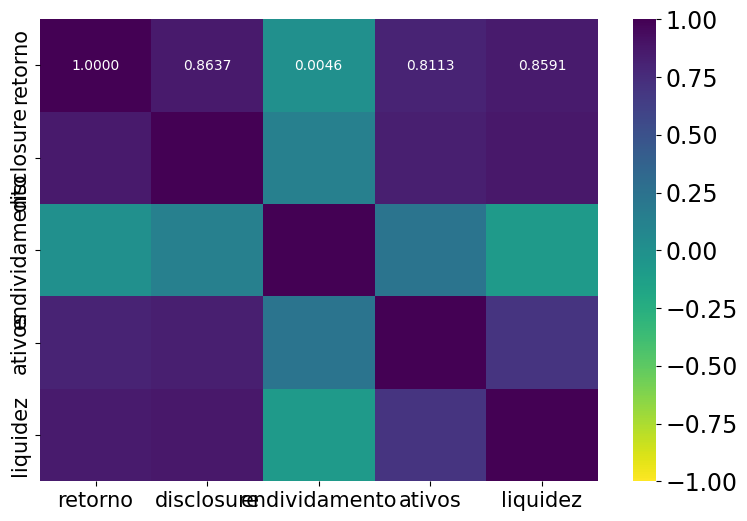

In [6]:
# In[5.1]: Matriz de correlações

correlation_matrix = df_empresas.iloc[:,1:6].corr()
correlation_matrix

# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(9,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 10}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

In [7]:
# In[5.2]: Matriz de correlações
# Maneira mais elaborada pela função 'rcorr' do pacote 'pingouin'

correlation_matrix2 = pg.rcorr(df_empresas, method='pearson',
                              upper='pval', decimals=4,
                              pval_stars={0.01: '***',
                                          0.05: '**',
                                          0.10: '*'})
correlation_matrix2

,retorno,disclosure,endividamento,ativos,liquidez
retorno,-,***,,***,***
disclosure,0.8637,-,,***,***
endividamento,0.0046,0.1366,-,**,
ativos,0.8113,0.8313,0.2281,-,***
liquidez,0.8591,0.8676,-0.0818,0.7023,-


endividamento não possui correlação significativa para prever retorno, enquanto disclosure, ativos e liquidez possuem alta correlação com retorno e também entre si (possível de não serem todas necessárias por esse último fato)

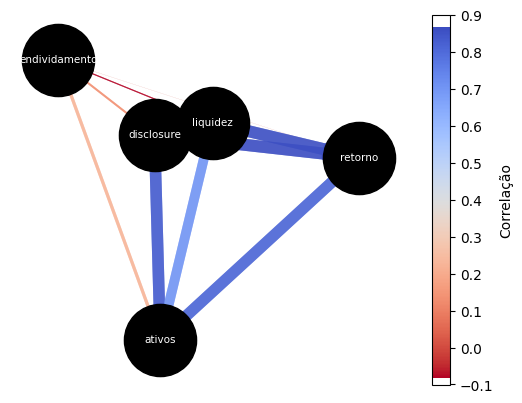

In [10]:
# In[5.3]: Diagrama interessante (grafo) que mostra a inter-relação entre as
#variáveis e a magnitude das correlações entre elas

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in correlation_matrix.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(correlation_matrix.columns):
    for j, variable2 in enumerate(correlation_matrix.columns):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Ajuste das posições dos nós das variáveis
pos["retorno"] = (pos["retorno"][0] + 1.8, pos["retorno"][1] + 1.8)
pos["disclosure"] = (pos["disclosure"][0], pos["disclosure"][1] + 1.8)
pos["endividamento"] = (pos["endividamento"][0], pos["endividamento"][1] + 1.8)
pos["ativos"] = (pos["ativos"][0], pos["ativos"][1])
pos["liquidez"] = (pos["liquidez"][0], pos["liquidez"][1] + 1.8)

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations),0) - 0.1,
                         max(correlations) + 0.1, 0.1))

# Exibição do gráfico
plt.show()

<Figure size 2000x1000 with 0 Axes>

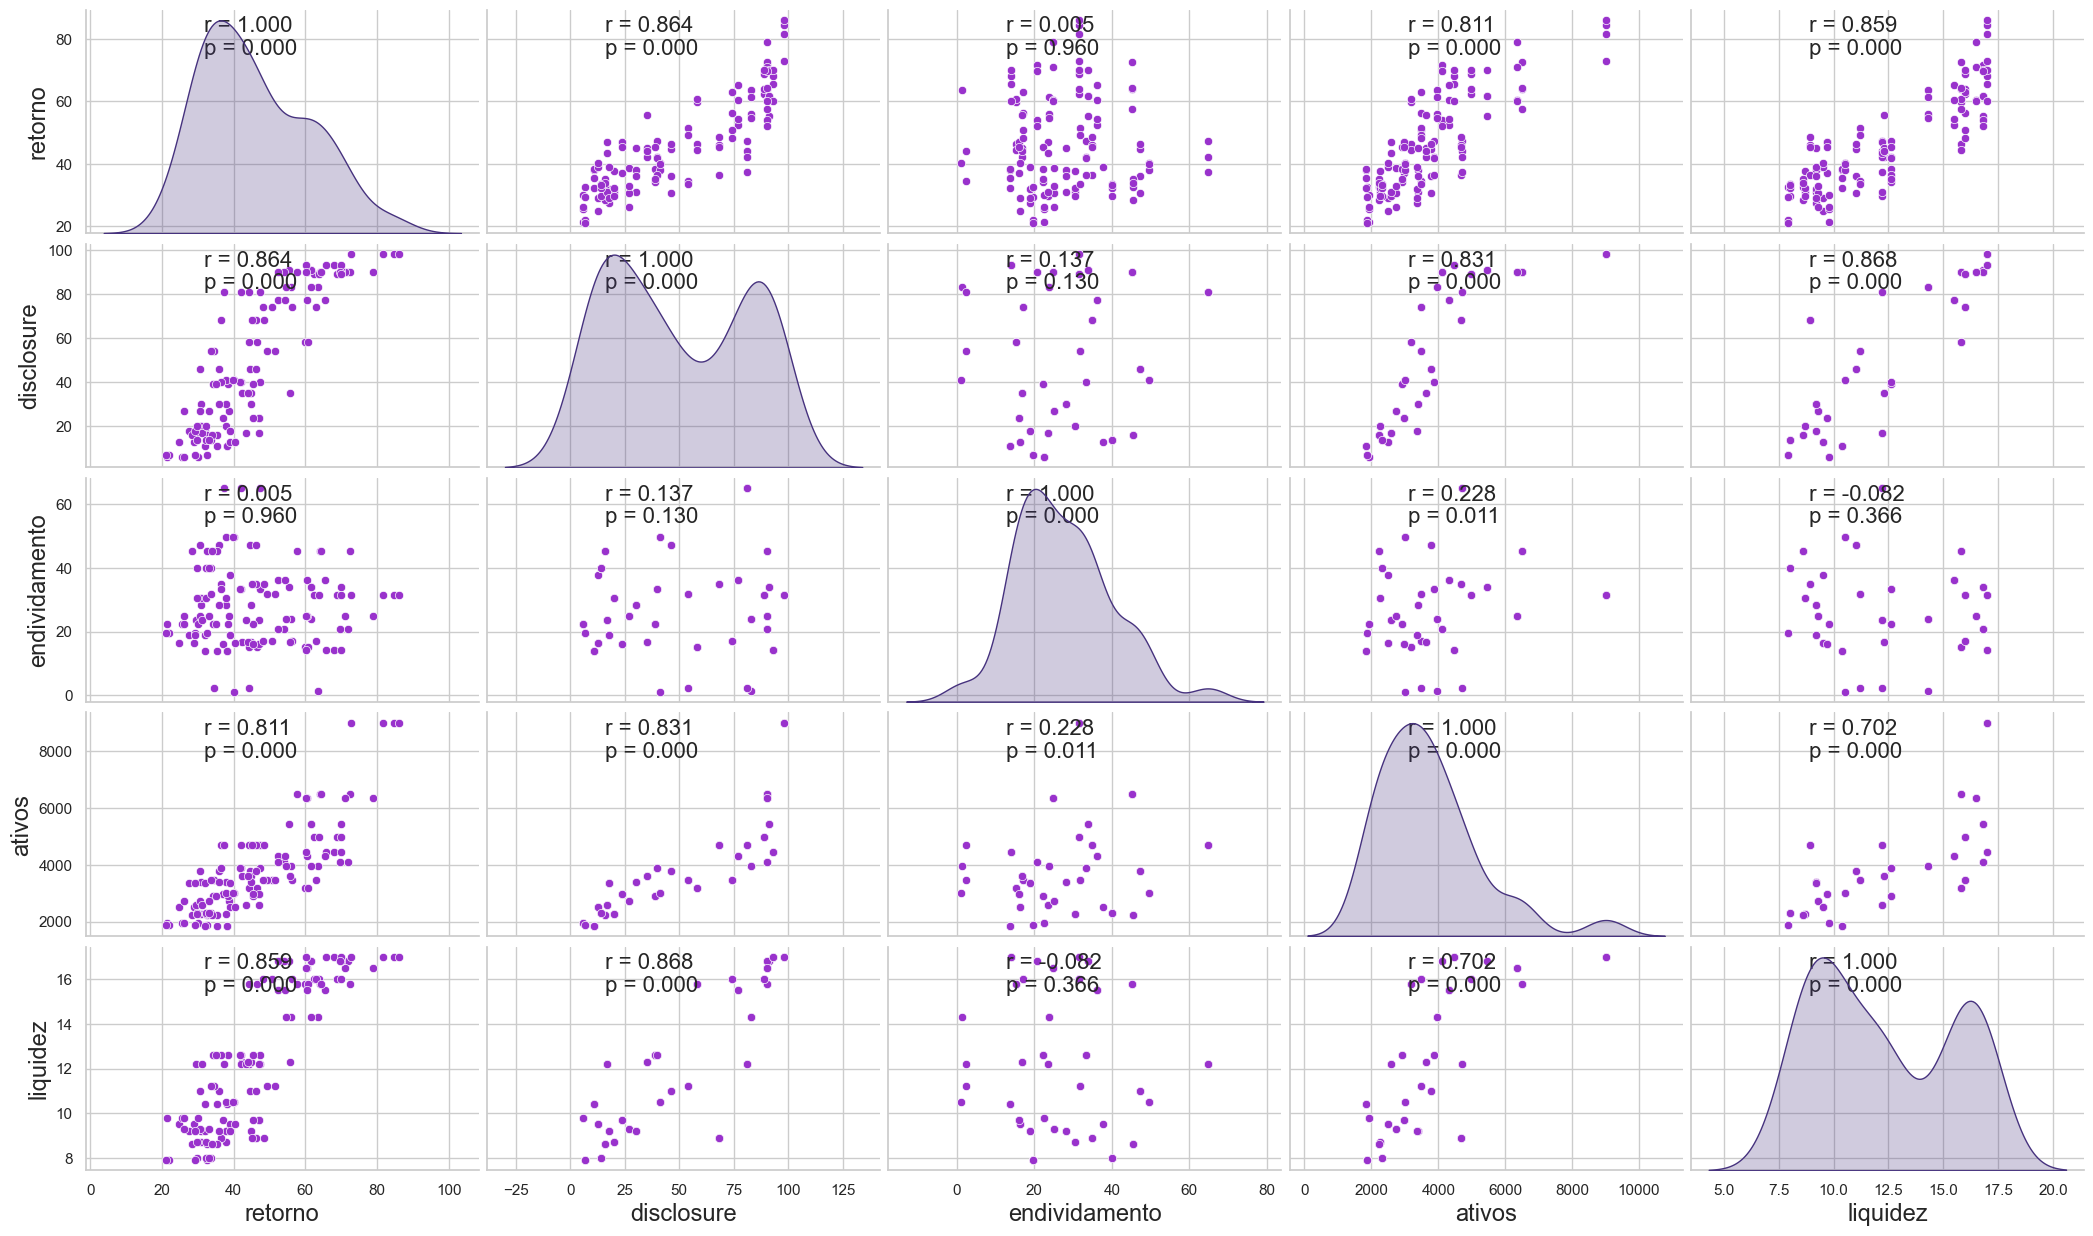

In [11]:
# In[5.4]: Distribuições das variáveis, scatters, valores das correlações e
#suas respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.30, .9), xycoords=ax.transAxes, fontsize=16)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.30, .8), xycoords=ax.transAxes, fontsize=16)

# Configuração do gráfico
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(20,10))
graph = sns.pairplot(df_empresas, diag_kind="kde",
                     plot_kws={"color": "darkorchid"},
                     height=2.5, aspect=1.7)
graph.map(corrfunc)
for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
plt.show()

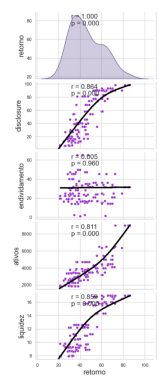

In [13]:
# Carregar a imagem
img = mpimg.imread('data/output_5.4.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Ocultar os eixos
plt.show()


modelo final vai ser um hiperplano desses fits!


In [15]:
# In[5.5]: Estimando o Modelo de Regressão Múltipla
modelo_empresas = sm.OLS.from_formula('retorno ~ disclosure +\
                                      endividamento + ativos +\
                                          liquidez', df_empresas).fit()

# Parâmetros do 'modelo_empresas'
print(modelo_empresas.summary())

# Note que o parâmetro da variável 'endividamento' não é estatisticamente
# significante ao nível de significância de 5% (nível de confiança de 95%).

                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.35e-45
Time:                        22:35:26   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0506      4.080      1.483

OLHAR P VALUE:<br>
Estatisticamente significante (<0.05) para disclosure, ativos e liquidez<br>
ENTRETANTO ESSA ANÁLISE É CONJUNTA - NECESSÁRIO OLHAR SE AS VARIÁVEIS SÃO ESTATÍSTICAMENTE SIGNIFICANTES SEPARADAMENTE: 04_script_complementar_significancia_modelo_multivariado<br>

In [16]:
# In[5.6]: Procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/


# Estimação do modelo por meio do procedimento Stepwise
modelo_step_empresas = stepwise(modelo_empresas, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 retorno ~ Q('disclosure') + Q('endividamento') + Q('ativos') + Q('liquidez')

 Discarding atribute "Q('endividamento')" with p-value equal to 0.08749071283026526 

Estimating model...: 
 retorno ~ Q('disclosure') + Q('ativos') + Q('liquidez')

 Discarding atribute "Q('disclosure')" with p-value equal to 0.06514029954310761 

Estimating model...: 
 retorno ~ Q('ativos') + Q('liquidez')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('endividamento')", 'p-value': 0.08749071283026526}
{'atribute': "Q('disclosure')", 'p-value': 0.06514029954310761}

 Model after stepwise process...: 
 retorno ~ Q('ativos') + Q('liquidez') 

                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Leas

In [17]:
# In[5.7]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_step_empresas.resid)

# Teste de Shapiro-Francia (n >= 30)
# Carregamento da função 'shapiro_francia' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/


# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_empresas.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9738705318499367
statistics z  :  2.093425694886853
p-value  :  0.01815558534418697
Statistics W=0.97387, p-value=0.018156
Rejeita-se H0 - Distribuição não aderente à normalidade


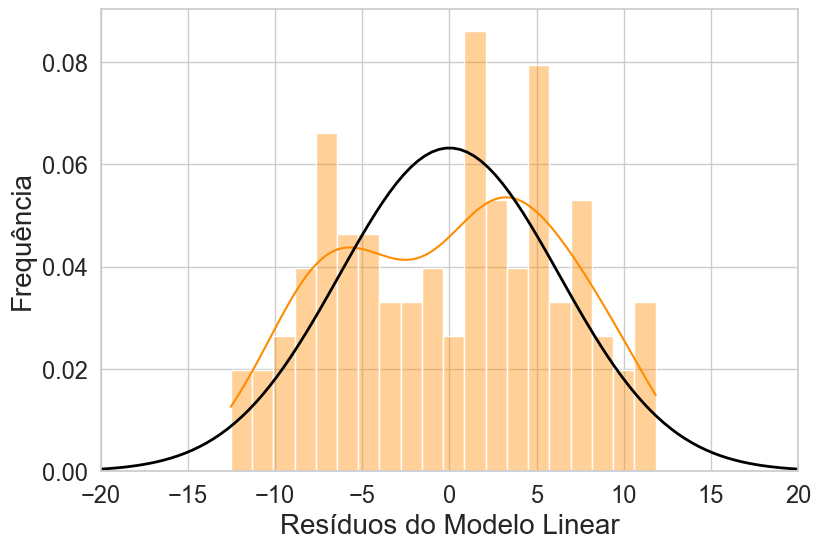

In [18]:
# In[5.8]: Plotando os resíduos do 'modelo_step_empresas' e acrescentando
#uma curva normal teórica para comparação entre as distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
#função densidade de probabilidade de determinada variável

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_empresas.resid)

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.histplot(modelo_step_empresas.resid, bins=20, kde=True, stat="density",
             color='darkorange', alpha=0.4)
plt.xlim(-20, 20)
x = np.linspace(-20, 20, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Linear', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [19]:
# In[5.9]: Transformação de Box-Cox

# Para o cálculo do lambda de Box-Cox

# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_empresas['retorno'])

print("Lambda: ",lmbda)

Lambda:  -0.022564100754067663


In [20]:
# In[5.10]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo

df_empresas['bc_retorno'] = yast
df_empresas

# Verificação do cálculo, **apenas para fins didáticos**
df_empresas['bc_retorno2'] = ((df_empresas['retorno'])**(lmbda) - 1) / (lmbda)
df_empresas.head()

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno,bc_retorno2
0,Adidas,63.67,83,1.3,3967,14.3,3.965002,3.965002
1,BASF,55.49,91,33.9,5450,16.8,3.839599,3.839599
2,Bayer,52.42,77,36.1,4327,15.5,3.787582,3.787582
3,BSH,54.00,90,20.8,4109,16.8,3.814731,3.814731
4,Bosch,68.01,93,14.1,4458,17.0,4.024999,4.024999


In [ ]:
del df_empresas['bc_retorno2']

In [21]:
# In[5.11]: Estimando um novo modelo múltiplo com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_retorno ~ disclosure +\
                                endividamento + ativos +\
                                    liquidez', df_empresas).fit()

# Parâmetros do 'modelo_bc'
print(modelo_bc.summary())

                            OLS Regression Results                            
Dep. Variable:             bc_retorno   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     119.9
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           8.80e-41
Time:                        22:57:14   Log-Likelihood:                 74.551
No. Observations:                 124   AIC:                            -139.1
Df Residuals:                     119   BIC:                            -125.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8844      0.088     32.752

In [22]:
# In[5.12]: Aplicando o procedimento Stepwise no 'modelo_bc"

modelo_step_empresas_bc = stepwise(modelo_bc, pvalue_limit=0.05)

# Note que a variável 'disclosure' retorna ao modelo na forma funcional
#não linear!

Regression type: OLS 

Estimating model...: 
 bc_retorno ~ Q('disclosure') + Q('endividamento') + Q('ativos') + Q('liquidez')

 Discarding atribute "Q('endividamento')" with p-value equal to 0.25966291656258195 

Estimating model...: 
 bc_retorno ~ Q('disclosure') + Q('ativos') + Q('liquidez')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('endividamento')", 'p-value': 0.25966291656258195}

 Model after stepwise process...: 
 bc_retorno ~ Q('disclosure') + Q('ativos') + Q('liquidez') 

                            OLS Regression Results                            
Dep. Variable:             bc_retorno   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.21e-41
Time:                        22:58:02   Log-Likeliho

Então são 3 motivos para excluir uma variável do modelo multivariado:
1. Ela individualmente já não passa.
2. Ela não passa por um problema de multicolinearidade com outras variáveis preditoras
3. Uso incorreto da forma funcional (exemplo: se você supõe que o modelo é linear e o fit dessa variável não é linear)

In [23]:
# In[5.13]: Verificando a normalidade dos resíduos do 'modelo_step_empresas_bc'

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_empresas_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9870486145293822
statistics z  :  0.6866622509557848
p-value  :  0.24614779513016755
Statistics W=0.98705, p-value=0.246148
Não se rejeita H0 - Distribuição aderente à normalidade


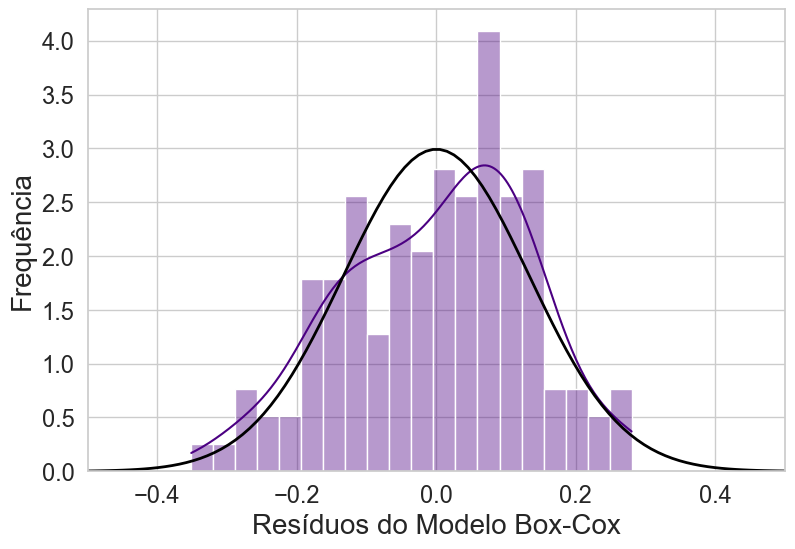

In [24]:
# In[5.14]: Plotando os novos resíduos do 'modelo_step_empresas_bc' e
#acrescentando uma curva normal teórica para comparação entre as distribuições

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_empresas_bc.resid)

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.histplot(modelo_step_empresas_bc.resid, bins=20, kde=True, stat="density",
             color='indigo', alpha=0.4)
plt.xlim(-0.5, 0.5)
x = np.linspace(-0.5, 0.5, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Box-Cox', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [26]:
# In[5.15]: Resumo dos dois modelos obtidos pelo procedimento Stepwise
#(linear e com Box-Cox)

summary_col([modelo_step_empresas, modelo_step_empresas_bc],
            model_names=["STEPWISE","STEPWISE BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

# CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

,STEPWISE,STEPWISE BOX-COX
Intercept,-2.5348,2.8275***
,(2.3409),(0.0725)
Q('ativos'),0.0040***,0.0000***
,(0.0005),(0.0000)
Q('disclosure'),,0.0031***
,,(0.0010)
Q('liquidez'),2.7391***,0.0398***
,(0.2575),(0.0078)
R-squared,0.8234,0.7990
R-squared Adj.,0.8205,0.7940


In [27]:
# In[5.16]: Fazendo predições com o 'modelo_step_empresas_bc'
# Qual é o valor do retorno, em média, para 'disclosure' igual a 50,
#'liquidez' igual a 14 e 'ativos' igual a 4000, ceteris paribus?

modelo_step_empresas_bc.predict(pd.DataFrame({'const':[1],
                                              'disclosure':[50],
                                              'ativos':[4000],
                                              'liquidez':[14]}))

0    3.702016
dtype: float64

In [28]:
# In[5.17]: Não podemos nos esquecer de fazer o cálculo para a obtenção do
#fitted value de Y (variável 'retorno')

(3.702016 * lmbda + 1) ** (1 / lmbda)

47.74261279070688

In [29]:
# In[5.18]: Salvando os fitted values de 'modelo_step_empresas' e
#'modelo_step_empresas_bc'

df_empresas['yhat_step_empresas'] = modelo_step_empresas.fittedvalues
df_empresas['yhat_step_empresas_bc'] = (modelo_step_empresas_bc.fittedvalues
                                        * lmbda + 1) ** (1 / lmbda)

# Visualizando os dois fitted values dos modelos 'modelo_step_empresas' e
#'modelo_step_empresas_bc' no dataset
df_empresas[['empresa','retorno','yhat_step_empresas','yhat_step_empresas_bc']]

,empresa,retorno,yhat_step_empresas,yhat_step_empresas_bc
0,Adidas,63.67,52.590460,54.072393
1,BASF,55.49,65.403203,66.165319
2,Bayer,52.42,57.325376,56.706216
3,BSH,54.00,60.009319,62.161048
4,Bosch,68.01,61.960912,64.337230
...,...,...,...,...
119,DuPont,39.85,38.276327,38.078000
120,ExxonMobil,44.16,45.724617,41.446025
121,FedEx,45.38,35.988530,34.685312
122,Ford Motors,45.25,40.711577,41.929545


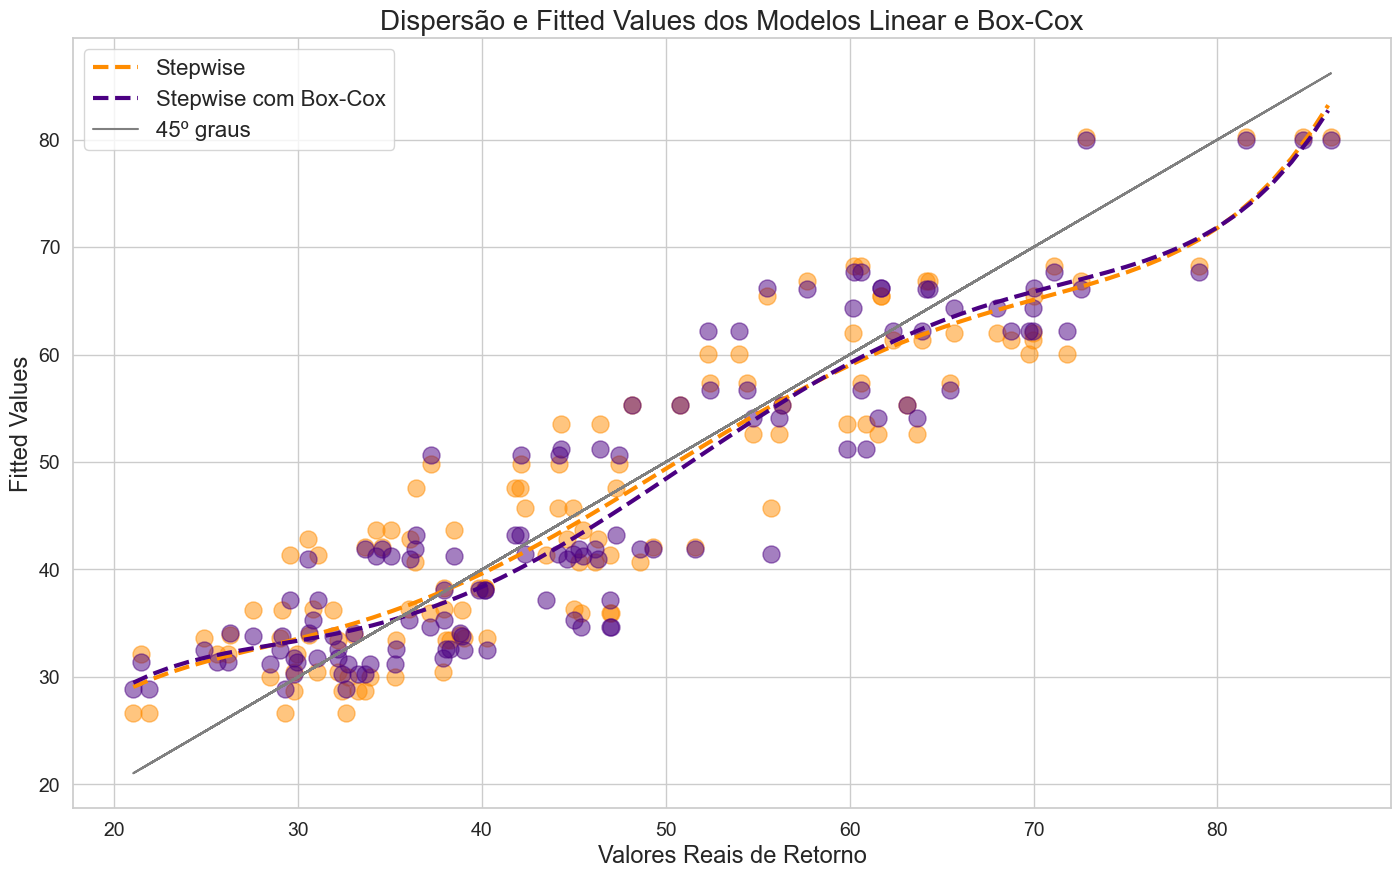

In [30]:
# In[5.19]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_empresas['retorno']
ydata_linear = df_empresas['yhat_step_empresas']
ydata_bc = df_empresas['yhat_step_empresas_bc']

plt.figure(figsize=(17,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='darkorange', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='indigo', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=150, color='darkorange')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=150, color='indigo')
plt.title('Dispersão e Fitted Values dos Modelos Linear e Box-Cox',
          fontsize=20)
plt.xlabel('Valores Reais de Retorno', fontsize=17)
plt.ylabel('Fitted Values', fontsize=17)
plt.legend(['Stepwise','Stepwise com Box-Cox','45º graus'], fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:

# In[EXEMPLO 6]:
#############################################################################
#         DIAGNÓSTICO DE MULTICOLINEARIDADE EM MODELOS DE REGRESSÃO         #
#                EXEMPLO 6 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

df_salarios = pd.read_csv('salarios.csv', delimiter=',')
df_salarios

# Características das variáveis do dataset
df_salarios.info()

# Estatísticas univariadas
df_salarios.describe()

# In[6.1]: Matriz de correlações

correlation_matrix = df_salarios.iloc[:,1:6].corr()
correlation_matrix

# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(9,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".3f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 20}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

# In[6.2]: CORRELAÇÃO BAIXA (variáveis 'rh1' e 'econometria1'):

# Correlação entre 'rh1' e 'econometria1', com p-value
corr1, p_value1 = pearsonr(df_salarios['rh1'], df_salarios['econometria1'])
"{:.4f}".format(corr1), "{:.4f}".format(p_value1)

# Matriz de correlação (maneira simples) pela função 'corr'
corr1 = df_salarios[['rh1','econometria1']].corr()
corr1

# Maneira mais elaborada pela função 'rcorr' do pacote 'pingouin'

corr1b = pg.rcorr(df_salarios[['rh1','econometria1']], method='pearson',
                  upper='pval', decimals=6,
                  pval_stars={0.01: '***',
                              0.05: '**',
                              0.10: '*'})
corr1b

# Mapa de calor com a correlação entre 'rh1' e 'econometria1'
plt.figure(figsize=(9,6))
heatmap = sns.heatmap(corr1, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 30}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

# In[6.3]: Grafo com a inter-relação entre as variáveis do dataframe 'df1'

df1 = df_salarios[['salario','rh1','econometria1']]
cormat1 = df1.corr()
cormat1

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in cormat1.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(cormat1.columns):
    for j, variable2 in enumerate(cormat1.columns):
        if i != j:
            correlation = cormat1.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('viridis_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.9)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations),1),
                         max(correlations), 0.1))

# Exibição do gráfico
plt.show()

# In[6.4]: Modelo 1

modelo1 = sm.OLS.from_formula('salario ~ rh1 + econometria1', df_salarios).fit()

modelo1.summary()

# In[6.5]: Diagnóstico de multicolinearidade (Variance Inflation Factor
#e Tolerance)

# Calculando os valores de VIF
X1 = sm.add_constant(df_salarios[['rh1', 'econometria1']])
VIF = pd.DataFrame()
VIF["Variável"] = X1.columns[1:]
VIF["VIF"] = [variance_inflation_factor(X1.values, i+1)
              for i in range(X1.shape[1]-1)]

# Calculando as Tolerâncias
VIF["Tolerância"] = 1 / VIF["VIF"]
VIF

# In[6.6]: CORRELAÇÃO MUITO ALTA (variáveis 'rh2' e 'econometria2'):

# Correlação entre 'rh2' e 'econometria2', com p-value
corr2, p_value2 = pearsonr(df_salarios['rh2'], df_salarios['econometria2'])
"{:.4f}".format(corr2), "{:.4f}".format(p_value2)

# Matriz de correlação (maneira simples) pela função 'corr'
corr2 = df_salarios[['rh2','econometria2']].corr()
corr2

# Maneira mais elaborada pela função 'rcorr' do pacote 'pingouin'

corr2b = pg.rcorr(df_salarios[['rh2','econometria2']], method='pearson',
                  upper='pval', decimals=6,
                  pval_stars={0.01: '***',
                              0.05: '**',
                              0.10: '*'})
corr2b

# Mapa de calor com a correlação entre 'rh2' e 'econometria2'
plt.figure(figsize=(9,6))
heatmap = sns.heatmap(corr2, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 30}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

# In[6.7]: Grafo com a inter-relação entre as variáveis do dataframe 'df2'

df2 = df_salarios[['salario','rh2','econometria2']]
cormat2 = df2.corr()
cormat2

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in cormat2.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(cormat2.columns):
    for j, variable2 in enumerate(cormat2.columns):
        if i != j:
            correlation = cormat2.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('viridis_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.9)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations) - 0.01,2),
                         max(correlations) + 0.01, 0.01))

# Exibição do gráfico
plt.show()

# In[6.8]: Modelo 2

modelo2 = sm.OLS.from_formula('salario ~ rh2 + econometria2', df_salarios).fit()

modelo2.summary()

# In[6.9]: Diagnóstico de multicolinearidade (Variance Inflation Factor
#e Tolerance)

# Calculando os valores de VIF
X2 = sm.add_constant(df_salarios[['rh2', 'econometria2']])
VIF = pd.DataFrame()
VIF["Variável"] = X2.columns[1:]
VIF["VIF"] = [variance_inflation_factor(X2.values, i+1)
              for i in range(X2.shape[1]-1)]

# Calculando as Tolerâncias
VIF["Tolerância"] = 1 / VIF["VIF"]
VIF


# In[EXEMPLO 7]:
#############################################################################
#        DIAGNÓSTICO DE HETEROCEDASTICIDADE EM MODELOS DE REGRESSÃO         #
#               EXEMPLO 7 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################
    
df_saeb_rend = pd.read_csv('saeb_rend.csv', delimiter=',')
df_saeb_rend

# Características das variáveis do dataset
df_saeb_rend.info()

# Estatísticas univariadas
df_saeb_rend.describe()

# In[7.1]: Tabela de frequências absolutas das variáveis 'uf' e rede'

df_saeb_rend['uf'].value_counts().sort_index()
df_saeb_rend['rede'].value_counts().sort_index()

# In[7.2]: Plotando a variável 'saeb' em função de 'rendimento', com fit linear
# Gráfico pela função 'regplot' do 'seaborn'

plt.figure(figsize=(9,6))
sns.regplot(x='rendimento', y='saeb', data=df_saeb_rend, marker='o',
            color='royalblue', ci=False,
            scatter_kws={'color':'lightsalmon', 'alpha':0.5, 's':150},
            line_kws={'linewidth': 4})
plt.title('Gráfico de Dispersão com Ajuste Linear', fontsize=22)
plt.xlabel('rendimento', fontsize=20)
plt.ylabel('saeb', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# In[7.3]: Plotando a variável 'saeb' em função de 'rendimento', com destaque
#para a 'rede' escolar e linear fits -> Gráfico pela função 'regplot' do
#pacote 'seaborn'

# Definição de dataframes com subgrupos por 'rede'
df1 = df_saeb_rend[df_saeb_rend['rede'] == 'Municipal']
df2 = df_saeb_rend[df_saeb_rend['rede'] == 'Estadual']
df3 = df_saeb_rend[df_saeb_rend['rede'] == 'Federal']

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.regplot(x='rendimento', y='saeb', data=df1, marker='o', ci=False,
            scatter_kws={'color':'darkorange', 'alpha':0.3, 's':150},
            line_kws={'color':'darkorange', 'linewidth': 4}, label='Municipal')
sns.regplot(x='rendimento', y='saeb', data=df2, marker='o', ci=False,
            scatter_kws={'color':'darkviolet', 'alpha':0.3, 's':150},
            line_kws={'color':'darkviolet', 'linewidth': 4}, label='Estadual')
sns.regplot(x='rendimento', y='saeb', data=df3, marker='o', ci=False,
            scatter_kws={'color':'darkgreen', 'alpha':0.8, 's':150},
            line_kws={'color':'darkgreen', 'linewidth': 4}, label='Federal')
plt.title('Gráfico de Dispersão com Ajuste Linear por Rede', fontsize=22)
plt.xlabel('rendimento', fontsize=20)
plt.ylabel('saeb', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

# In[7.4]: Estimação do modelo de regressão e diagnóstico de heterocedasticidade

# Estimando o modelo
modelo_saeb = sm.OLS.from_formula('saeb ~ rendimento', df_saeb_rend).fit()

# Parâmetros do 'modelo_saeb'
modelo_saeb.summary()

# In[7.5]: Adicionando fitted values e resíduos do 'modelo_saeb' no
# dataset 'df_saeb_rend'

df_saeb_rend['fitted'] = modelo_saeb.fittedvalues
df_saeb_rend['residuos'] = modelo_saeb.resid
df_saeb_rend

# In[7.6]: Gráfico que relaciona resíduos e fitted values do 'modelo_saeb'

plt.figure(figsize=(9,6))
sns.regplot(x='fitted', y='residuos', data=df_saeb_rend,
            marker='o', fit_reg=False,
            scatter_kws={"color":'red', 'alpha':0.2, 's':150})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo', fontsize=20)
plt.ylabel('Resíduos do Modelo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# In[7.7]: Histograma dos resíduos do 'modelo_saeb' com curva normal teórica
#para comparação das distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
#função densidade de probabilidade de determinada variável

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_saeb.resid)

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.histplot(modelo_saeb.resid, bins=20, kde=True, stat="density",
             color='red', alpha=0.4)
plt.xlim(-4, 4)
x = np.linspace(-4, 4, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Linear', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# In[7.8]: Função para o teste de Breusch-Pagan para a elaboração de diagnóstico
#de heterocedasticidade

# Criação da função 'breusch_pagan_test'

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

# In[7.9]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_saeb)
# Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

# Interpretação
teste_bp = breusch_pagan_test(modelo_saeb) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.05 #nível de significância
if p > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

# In[7.10]: Procedimento n-1 dummies para as unidades federativas
    
# Dummização da variável 'uf'

df_saeb_rend_dummies = pd.get_dummies(df_saeb_rend, columns=['uf'],
                                      dtype=int,
                                      drop_first=True)

df_saeb_rend_dummies

# In[7.11]: Estimação do modelo de regressão múltipla com n-1 dummies

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_saeb_rend_dummies.drop(columns=['municipio',
                                                        'codigo',
                                                        'escola',
                                                        'rede',
                                                        'saeb',
                                                        'fitted',
                                                        'residuos']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "saeb ~ " + formula_dummies_modelo

# Estimação
modelo_saeb_dummies_uf = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_saeb_rend_dummies).fit()

# Parâmetros do modelo 'modelo_saeb_dummies_uf'
modelo_saeb_dummies_uf.summary()

# In[7.12]: Estimação do modelo por meio do procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/


modelo_saeb_dummies_uf_step = stepwise(modelo_saeb_dummies_uf, pvalue_limit=0.05)

# In[7.13]: Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
#no 'modelo_saeb_dummies_uf_step'

breusch_pagan_test(modelo_saeb_dummies_uf_step)

# Interpretação
teste_bp = breusch_pagan_test(modelo_saeb_dummies_uf_step) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.05 #nível de significância
if p > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

# In[7.14]: Adicionando fitted values e resíduos do 'modelo_saeb_dummies_uf_step'
#no dataset 'df_saeb_rend'

df_saeb_rend['fitted_step'] = modelo_saeb_dummies_uf_step.fittedvalues
df_saeb_rend['residuos_step'] = modelo_saeb_dummies_uf_step.resid
df_saeb_rend

# In[7.15]: Gráfico que relaciona resíduos e fitted values do
#'modelo_saeb_dummies_uf_step'

plt.figure(figsize=(9,6))
sns.regplot(x='fitted_step', y='residuos_step', data=df_saeb_rend,
            marker='o', fit_reg=False,
            scatter_kws={"color":'dodgerblue', 'alpha':0.2, 's':150})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise com Dummies', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise com Dummies', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# In[7.16]: Histograma dos resíduos do 'modelo_saeb_dummies_uf_step' com curva
#normal teórica para comparação das distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
#função densidade de probabilidade de determinada variável

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_saeb_dummies_uf_step.resid)

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.histplot(modelo_saeb_dummies_uf_step.resid, bins=20, kde=True,
             stat="density", color='dodgerblue', alpha=0.4)
plt.xlim(-4, 4)
x = np.linspace(-4, 4, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Stepwise com Dummies', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# In[7.17]: Plotando a variável 'saeb' em função de 'rendimento', com destaque
#para as unidades federativas e fits lineares - Gráfico pela função 'lmplot' do
#pacote 'seaborn', com estratificação de 'uf' pelo argumento 'hue'

uf_order = df_saeb_rend['uf'].value_counts().index.sort_values()

plt.figure(figsize=(9,6))
sns.lmplot(x='rendimento', y='saeb', data=df_saeb_rend,
           hue='uf', ci=None, palette='viridis', legend=False,
           scatter_kws={'alpha': 0.5},
           hue_order=uf_order)
plt.title('Gráfico de Dispersão com Ajuste Linear por UF', fontsize=13)
plt.xlabel('rendimento', fontsize=12)
plt.ylabel('saeb', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, ncol=3, bbox_to_anchor=(1, 0.75))
plt.show()


# In[EXEMPLO 8]:
#############################################################################
#                 REGRESSÃO NÃO LINEAR MÚLTIPLA COM DUMMIES                 #
#                 EXEMPLO 8 - CARREGAMENTO DA BASE DE DADOS                 #
#############################################################################

df_planosaude = pd.read_csv('planosaude.csv', delimiter=',')
df_planosaude

# Características das variáveis do dataset
df_planosaude.info()

# Estatísticas univariadas
df_planosaude.describe()

# In[8.1]: Tabela de frequências absolutas da variável 'plano'

df_planosaude['plano'].value_counts().sort_index()

# In[8.2]: Distribuições das variáveis, scatters, valores das correlações e
#suas respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.30, .9), xycoords=ax.transAxes, fontsize=16)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.30, .8), xycoords=ax.transAxes, fontsize=16)

# Configuração do gráfico
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(20,10))
graph = sns.pairplot(df_planosaude.loc[:,'despmed':'renda'], diag_kind="kde",
                     plot_kws={"color": "darkorange"},
                     height=2.5, aspect=1.7)
graph.map(corrfunc)
for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
plt.show()

# In[8.3]: Dummizando a variável 'plano' (n-1 dummies)

df_planosaude_dummies = pd.get_dummies(df_planosaude, columns=['plano'],
                                       dtype=int,
                                       drop_first=True)

df_planosaude_dummies

# In[8.4]: Estimação do modelo de regressão múltipla com n-1 dummies

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_planosaude_dummies.drop(columns=['id',
                                                         'despmed']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "despmed ~ " + formula_dummies_modelo

# Estimação
modelo_planosaude = sm.OLS.from_formula(formula_dummies_modelo,
                                        df_planosaude_dummies).fit()

# Parâmetros do modelo
modelo_planosaude.summary()

# In[8.5]: Procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_planosaude = stepwise(modelo_planosaude, pvalue_limit=0.05)

# In[8.6]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Francia (n >= 30)
# Carregamento da função 'shapiro_francia' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_planosaude.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

# In[8.7]: Histograma dos resíduos do 'modelo_step_planosaude' com curva normal
#teórica para comparação das distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
#função densidade de probabilidade de determinada variável

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_planosaude.resid)

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.histplot(modelo_step_planosaude.resid, bins=15, kde=True, stat="density",
             color='red', alpha=0.4)
plt.xlim(-60, 70)
x = np.linspace(-60, 70, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Stepwise Linear', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# In[8.8]: Função para o teste de Breusch-Pagan para a elaboração de diagnóstico
#de heterocedasticidade

# Criação da função 'breusch_pagan_test'

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

# In[8.9]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_planosaude)
# Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

# Interpretação
teste_bp = breusch_pagan_test(modelo_step_planosaude) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.05 #nível de significância
if p > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

# In[8.10]: Adicionando fitted values e resíduos do 'modelo_step_planosaude'
#no dataframe 'df_planosaude_dummies'

df_planosaude_dummies['fitted_step'] = modelo_step_planosaude.fittedvalues
df_planosaude_dummies['residuos_step'] = modelo_step_planosaude.resid
df_planosaude_dummies

# In[8.11]: Gráfico que relaciona resíduos e fitted values do
#'modelo_step_planosaude'

plt.figure(figsize=(9,6))
sns.regplot(x='fitted_step', y='residuos_step', data=df_planosaude_dummies,
            marker='o', fit_reg=False,
            scatter_kws={"color":'red', 'alpha':0.5, 's':200})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(np.arange(-50, 71, 20), fontsize=17)
x_min = df_planosaude_dummies['fitted_step'].min()-1
x_max = df_planosaude_dummies['fitted_step'].max()+1
plt.xlim(x_min, x_max)
plt.show()

# In[8.12]: Gráfico que relaciona resíduos e fitted values do
#'modelo_step_planosaude', com boundaries

plt.figure(figsize=(9,6))
sns.regplot(x='fitted_step', y='residuos_step', data=df_planosaude_dummies,
            marker='o', fit_reg=False,
            scatter_kws={"color":'red', 'alpha':0.5, 's':200})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(np.arange(-50, 71, 20), fontsize=17)
x_min = df_planosaude_dummies['fitted_step'].min()-1
x_max = df_planosaude_dummies['fitted_step'].max()+1
plt.xlim(x_min, x_max)

sns.kdeplot(data=df_planosaude_dummies, x='fitted_step', y='residuos_step',
            levels=2, color='red', linewidths=3)

plt.show()

# In[8.13]: Transformação de Box-Cox

# Para o cálculo do lambda de Box-Cox

# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_planosaude_dummies['despmed'])

print("Lambda: ",lmbda)

# In[8.14]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo

df_planosaude_dummies['bc_despmed'] = yast
df_planosaude_dummies

# Verificação do cálculo, apenas para fins didáticos
df_planosaude_dummies['bc_despmed2'] = ((df_planosaude_dummies['despmed'])**\
                                        (lmbda) - 1) / (lmbda)
df_planosaude_dummies

del df_planosaude_dummies['bc_despmed2']

# In[8.15]: Estimando um novo modelo com todas as variáveis e a variável
#dependente transformada
modelo_bc_planosaude = sm.OLS.from_formula('bc_despmed ~ idade + dcron +\
                                           renda + plano_esmeralda +\
                                               plano_ouro',
                                               df_planosaude_dummies).fit()

# Parâmetros do modelo
modelo_bc_planosaude.summary()

# In[8.16]: Procedimento Stepwise no 'modelo_bc_planosaude'

modelo_step_bc_planosaude = stepwise(modelo_bc_planosaude, pvalue_limit=0.05)

# In[8.17]: Teste de verificação da aderência à normalidade dos resíduos do novo
#'modelo_step_bc_planosaude'

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc_planosaude.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

# In[8.18]: Histograma dos resíduos do 'modelo_step_bc_planosaude' com curva
#normal teórica para comparação das distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
#função densidade de probabilidade de determinada variável


# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_bc_planosaude.resid)

# Gráfico propriamente dito
plt.figure(figsize=(9,6))
sns.histplot(modelo_step_bc_planosaude.resid, bins=15, kde=True, stat="density",
             color='limegreen', alpha=0.4)
plt.xlim(-0.15, 0.15)
x = np.linspace(-0.15, 0.15, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Stepwise com Box-Cox', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# In[8.19]: Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
#no 'modelo_step_bc_planosaude'

breusch_pagan_test(modelo_step_bc_planosaude)

# Interpretação
teste_bp = breusch_pagan_test(modelo_step_bc_planosaude) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.05 #nível de significância
if p > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

# In[8.20]: Adicionando fitted values e resíduos do 'modelo_step_bc_planosaude'
#no dataframe 'df_planosaude_dummies'

df_planosaude_dummies['fitted_step_bc'] = modelo_step_bc_planosaude.fittedvalues
df_planosaude_dummies['residuos_step_bc'] = modelo_step_bc_planosaude.resid
df_planosaude_dummies

# In[8.21]: Gráfico que relaciona resíduos e fitted values do
#'modelo_step_bc_planosaude'

plt.figure(figsize=(9,6))
sns.regplot(x='fitted_step_bc', y='residuos_step_bc', data=df_planosaude_dummies,
            marker='o', fit_reg=False,
            scatter_kws={"color":'limegreen', 'alpha':0.5, 's':200})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise com Box-Cox', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise com Box-Cox', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(np.arange(-.15, .16, .05), fontsize=17)
x_min = df_planosaude_dummies['fitted_step_bc'].min()-0.01
x_max = df_planosaude_dummies['fitted_step_bc'].max()+0.01
plt.xlim(x_min, x_max)
plt.show()

# In[8.22]: Gráfico que relaciona resíduos e fitted values do
#'modelo_step_bc_planosaude', com boundaries

plt.figure(figsize=(9,6))
sns.regplot(x='fitted_step_bc', y='residuos_step_bc', data=df_planosaude_dummies,
            marker='o', fit_reg=False,
            scatter_kws={"color": 'limegreen', 'alpha': 0.5, 's': 200})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise com Box-Cox', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise com Box-Cox', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(np.arange(-.15, .16, .05), fontsize=17)
x_min = df_planosaude_dummies['fitted_step_bc'].min()-0.01
x_max = df_planosaude_dummies['fitted_step_bc'].max()+0.01
plt.xlim(x_min, x_max)

sns.kdeplot(data=df_planosaude_dummies, x='fitted_step_bc', y='residuos_step_bc',
            levels=2, color='green', linewidths=3)

################################## FIM ######################################